## Requeriments

In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import missingno as msno
from zipfile import ZipFile as zf
import random
#import sklearn.metrics       as Metrics

/pip_envs/Debuggers3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Uploading data (input3)

zip_file = zf('/mnt/workstation/data/inputs3.zip')

df = pd.read_csv(zip_file.open("inputs3.csv"))#, sep= ",", names =header)
df

In [2]:
df = pd.read_csv("/mnt/workstation/data/inputs3.csv")#, sep= ",", names =header)
df

,Unnamed: 0,Unnamed: 0.1,periodo,id_cli,fecha_nacimiento,edad,genero,estado_civil,nivel_academico,profesion,...,cuota_libranza_sf,cant_oblig_tot_sf,cant_cast_ult_12m_sr,ind,rep_calif_cred,pol_centr_ext,convenio_lib,ingreso_nomina,ingreso_segurida_social,gasto_familiar
0,0,0,201908.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,232526.0
1,1,1,201909.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,1.0,0.0,311715.5,C,0.0,NaN,1255032.0,NaN,265900.0
2,2,2,201907.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,1.0,0.0,311306.0,C,0.0,NaN,1255032.0,NaN,243052.0
3,3,3,201903.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,1.0,0.0,311306.0,C,0.0,NaN,1172612.0,NaN,276014.0
4,4,4,201911.0,2089776.0,19840630.0,35.0,M,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,...,0.0,0.0,0.0,677516.0,C,0.0,NaN,1255032.0,NaN,418866.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19255243,19255243,20899846,201910.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,...,0.0,3.0,0.0,929800.0,C,0.0,NaN,NaN,NaN,25500.0
19255244,19255244,20899847,202002.0,2090044.0,19670629.0,53.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,...,0.0,3.0,0.0,41800.0,D,0.0,NaN,NaN,NaN,147900.0
19255245,19255245,20899848,201903.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,...,0.0,0.0,0.0,928500.0,B,0.0,NaN,NaN,NaN,777437.1
19255246,19255246,20899849,202001.0,2090044.0,19670629.0,52.0,F,DIVORCIADO,UNIVERSITARIO,DERECHO,...,0.0,3.0,0.0,41800.0,D,0.0,NaN,NaN,NaN,1131012.0


In [3]:
df = df.iloc[:,2:]
df.columns

Index(['periodo', 'id_cli', 'fecha_nacimiento', 'edad', 'genero',
       'estado_civil', 'nivel_academico', 'profesion', 'ocupacion',
       'tipo_vivienda', 'ult_actual', 'categoria', 'codigo_ciiu',
       'ind_mora_vigente', 'cartera_castigada', 'ciudad_residencia',
       'departamento_residencia', 'ciudad_laboral', 'departamento_laboral',
       'rechazo_credito', 'mora_max', 'cant_moras_30_ult_12_meses',
       'cant_moras_60_ult_12_meses', 'cant_moras_90_ult_12_meses',
       'cupo_total_tc', 'tenencia_tc', 'cuota_tc_bancolombia', 'tiene_consumo',
       'tiene_crediagil', 'nro_tot_cuentas', 'ctas_activas',
       'tiene_ctas_activas', 'ctas_embargadas', 'tiene_ctas_embargadas',
       'pension_fopep', 'cuota_cred_hipot', 'tiene_cred_hipo_1',
       'tiene_cred_hipo_2', 'mediana_nom3', 'mediana_pen3', 'ingreso_nompen',
       'cat_ingreso', 'ingreso_final', 'cant_mora_30_tdc_ult_3m_sf',
       'cant_mora_30_consum_ult_3m_sf', 'cuota_de_vivienda',
       'cuota_de_consumo', 'cuota

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19255248 entries, 0 to 19255247
Data columns (total 65 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   periodo                        float64
 1   id_cli                         float64
 2   fecha_nacimiento               float64
 3   edad                           float64
 4   genero                         object 
 5   estado_civil                   object 
 6   nivel_academico                object 
 7   profesion                      object 
 8   ocupacion                      object 
 9   tipo_vivienda                  object 
 10  ult_actual                     float64
 11  categoria                      int64  
 12  codigo_ciiu                    float64
 13  ind_mora_vigente               bool   
 14  cartera_castigada              bool   
 15  ciudad_residencia              object 
 16  departamento_residencia        object 
 17  ciudad_laboral                 object 
 18  

In [5]:
100*df.isnull().sum()/df.shape[0]

periodo                     0.000000
id_cli                      0.000000
fecha_nacimiento            0.000000
edad                        0.000000
genero                      0.000000
                             ...    
pol_centr_ext              14.714830
convenio_lib               86.021027
ingreso_nomina             73.559510
ingreso_segurida_social    72.267015
gasto_familiar              0.000000
Length: 65, dtype: float64

In [6]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
features_i = features[features['type'] == 'int64'].index
features_b = features[features['type'] == 'bool'].index

In [7]:
100*df[features_f].isnull().sum()/df.shape[0]

periodo                           0.000000
id_cli                            0.000000
fecha_nacimiento                  0.000000
edad                              0.000000
ult_actual                        0.000000
codigo_ciiu                       0.000000
mora_max                         30.470727
cant_moras_30_ult_12_meses       30.470727
cant_moras_60_ult_12_meses       30.470727
cant_moras_90_ult_12_meses       30.470727
cupo_total_tc                     0.000000
cuota_tc_bancolombia              0.000000
nro_tot_cuentas                   0.000914
ctas_activas                      0.000914
ctas_embargadas                   0.000914
cuota_cred_hipot                 99.978972
mediana_nom3                      0.000000
mediana_pen3                      0.000000
ingreso_nompen                    0.000000
ingreso_final                     0.742577
cant_mora_30_tdc_ult_3m_sf       15.709509
cant_mora_30_consum_ult_3m_sf    15.709509
cuota_de_vivienda                 0.000000
cuota_de_co

In [8]:
100*df[features_o].isnull().sum()/df.shape[0]

genero                      0.000000
estado_civil                0.000000
nivel_academico             0.000000
profesion                   0.000000
ocupacion                   0.000000
tipo_vivienda               0.000000
ciudad_residencia           0.000000
departamento_residencia     0.000000
ciudad_laboral              0.000000
departamento_laboral        0.000000
rechazo_credito             0.000000
cat_ingreso                59.970991
rep_calif_cred              0.000000
dtype: float64

In [9]:
100*df[features_i].isnull().sum()/df.shape[0]

categoria    0.0
dtype: float64

In [10]:
100*df[features_b].isnull().sum()/df.shape[0]

ind_mora_vigente         0.0
cartera_castigada        0.0
tenencia_tc              0.0
tiene_consumo            0.0
tiene_crediagil          0.0
tiene_ctas_activas       0.0
tiene_ctas_embargadas    0.0
pension_fopep            0.0
tiene_cred_hipo_1        0.0
tiene_cred_hipo_2        0.0
dtype: float64

# Numerical variables

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
periodo,19255248.0,2.019594e+05,4.968779e+01,2.019020e+05,2.019070e+05,2.020010e+05,2.020070e+05,2.020110e+05
id_cli,19255248.0,3.393917e+06,2.461785e+06,3.000000e+00,1.374000e+06,2.895966e+06,4.940005e+06,8.704800e+06
fecha_nacimiento,19255248.0,1.978353e+07,1.377617e+05,1.900053e+07,1.970031e+07,1.981111e+07,1.989072e+07,2.020092e+07
edad,19255248.0,4.114562e+01,1.378647e+01,0.000000e+00,3.000000e+01,3.800000e+01,5.000000e+01,1.200000e+02
ult_actual,19255248.0,2.019040e+07,3.522273e+04,0.000000e+00,2.019011e+07,2.019072e+07,2.020010e+07,2.020102e+07
categoria,19255248.0,1.677362e+00,1.030227e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
codigo_ciiu,19255248.0,7.594965e+02,2.140895e+03,0.000000e+00,1.000000e+01,1.000000e+01,1.000000e+01,9.900000e+03
mora_max,13388034.0,4.653830e+00,2.200446e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.367000e+03
cant_moras_30_ult_12_meses,13388034.0,6.555361e-02,5.391823e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
cant_moras_60_ult_12_meses,13388034.0,3.357565e-02,4.088394e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01


# Categorical variables

In [12]:
df[features_o].describe(include='all').T

,count,unique,top,freq
genero,19255248,2,M,9731146
estado_civil,19255248,7,SOLTERO,8912674
nivel_academico,19255248,7,UNIVERSITARIO,6907133
profesion,19255248,80,\N,5775936
ocupacion,19255248,18,Empleado,11718865
tipo_vivienda,19255248,4,NO INFORMA,10204434
ciudad_residencia,19255248,1908,BOGOTA D.C.,4877742
departamento_residencia,19255248,39,ANTIOQUIA,6239768
ciudad_laboral,19255248,1625,\N,5230091
departamento_laboral,19255248,39,\N,5387458


## Categories

In [13]:
df['genero'].unique()

array(['M', 'F'], dtype=object)

In [14]:
df['estado_civil'].value_counts()/df.shape[0]*100

SOLTERO        46.286986
CASADO         26.628626
UNION LIBRE    11.500299
NO INFORMA      9.183211
DIVORCIADO      4.034775
VIUDO           1.743416
OTRO            0.622687
Name: estado_civil, dtype: float64

In [15]:
df['nivel_academico'].value_counts()/df.shape[0]*100

UNIVERSITARIO      35.871431
NO INFORMA         30.084770
TECNOLOGO          13.210352
BACHILLER          11.062948
ESPECIALIZACION     7.354956
PRIMARIO            1.379094
NINGUNO             1.036450
Name: nivel_academico, dtype: float64

In [16]:
df['profesion'].value_counts()/df.shape[0]*100

\N                                              29.996685
OTROS                                           26.967095
ADMINISTRACION                                   7.183974
CONTADURIA                                       3.159289
NINGUNA                                          3.088228
                                                  ...    
TECNOLOGIA DEPORTIVA                             0.011389
RELIGIOSA                                        0.011103
JOYERO                                           0.006544
INSPECTORES DE ESTABLECIMIENTOS DE ENSEÑANZA     0.003074
ESPEC EN PROBL DE PERS Y ORIENTA ANAL. PRP       0.002197
Name: profesion, Length: 80, dtype: float64

In [17]:
df['profesion'].unique()

array(['TECNOLOGIA SISTEMAS', 'VETERINARIA', '\\N', 'OTROS',
       'DISEÑO Y PUBLICIDAD', 'COMUNICACION SOCIAL',
       'INGENIERIA DE PETROLEOS', 'ADMINISTRACION', 'DERECHO',
       'PSICOLOGIA', 'BACTERIOLOGIA', 'INGENIERO METALURGICO',
       'INGENIERO', 'INGENIERIA DE SISTEMAS', 'ODONTOLOGIA',
       'INGENIERIA INDUSTRIAL', 'TECNOLOGIA ELECTRICIDAD', 'CONTADURIA',
       'NINGUNA', 'EDUCACION', 'SACERDOTE', 'QUIMICA FARMACEUTICA',
       'COMERCIO INTERNACIONAL', 'TECNOLOGIA AGROPECUARIA',
       'CONSTRUCCION CIVIL', 'INGENIERIA ADMINISTRATIVA',
       'INGENIERIA CIVIL', 'INGENIERO ELECTRONICO',
       'TECNOLOGIA INDUSTRIAL', 'INGENIERIA AMBIENTAL', 'TRABAJO SOCIAL',
       'TECNOLOGIA EN ADMINISTRACION', 'ECONOMIA', 'INGENIERIA AGRICOLA',
       'AGRONOMIA', 'MERCADOTECNIA', 'TRANSPORTADOR', 'ARQUITECTURA',
       'AUXILIAR CONTABLE', 'ENFERMERIA',
       'DECORADORES Y DISEÑADORES COMERCIALES', 'INGENIERIA ELECTRICA',
       'TECNOLOGIA EN CIENCIAS DE LA SALUD', 'SECRETARIA

In [18]:
df['ocupacion'].value_counts()/df.shape[0]*100

Empleado                     60.860629
Independiente                10.891104
Estudiante                    6.866289
Profesional Independiente     4.991875
Jubilado                      4.921666
Comerciante                   2.493824
Socio Empleado - Socio        2.290321
Ama de Casa                   2.243051
Otro                          1.314447
Pensionado                    0.956285
Rentista de Capital           0.910131
Sin Ocupacion Asignada        0.293317
Desempleado sin Ingresos      0.286182
Desempleado con Ingresos      0.269023
Ganadero                      0.221135
Agricultor                    0.140455
vacio                         0.048698
Vacío                         0.001568
Name: ocupacion, dtype: float64

In [19]:
df['tipo_vivienda'].value_counts()/df.shape[0]*100

NO INFORMA    52.995599
FAMILIAR      22.756939
PROPIA        15.844226
ALQUILADA      8.403236
Name: tipo_vivienda, dtype: float64

In [20]:
df['ciudad_residencia'].value_counts()/df.shape[0]*100

BOGOTA D.C.                  25.332013
MEDELLIN                     20.048098
CALI                          6.564501
BARRANQUILLA                  4.037393
ENVIGADO                      2.828715
                               ...    
PAILANIA                      0.000005
ORATORIO - NEMOCON            0.000005
ARIZAL - PUERTO ESCONDIDO     0.000005
SABANAS DE CALI - MORROA      0.000005
SANTANDER - LA UNION          0.000005
Name: ciudad_residencia, Length: 1908, dtype: float64

In [21]:
df['ciudad_residencia'].unique()

array(['CALI', 'GARZON', 'PALMIRA', ..., 'SAN DIEGO - SALAMINA',
       'LOS ANDES - GUAMAL', 'MATANZA'], dtype=object)

In [22]:
pd.DataFrame(df['ciudad_residencia'].unique()).to_csv("/mnt/workstation/data/Campo_ciudad_residencia.csv")

In [23]:
df['departamento_residencia'].value_counts()/df.shape[0]*100

ANTIOQUIA               32.405545
BOGOTA D.C.             22.344194
VALLE                    8.719908
CUNDINAMARCA             6.415487
ATLANTICO                4.962803
SANTANDER                3.241516
BOLIVAR                  2.823012
RISARALDA                1.956874
CALDAS                   1.455868
NORTE DE SANTANDER       1.439545
TOLIMA                   1.438107
CORDOBA                  1.215248
HUILA                    1.106706
META                     1.106119
MAGDALENA                1.102323
QUINDIO                  0.997349
BOYACA                   0.965124
SIN INFORMACION          0.883100
CESAR                    0.870319
CAUCA                    0.833430
NARIÑO                   0.704192
ESTADO EXTERIOR          0.581696
SUCRE                    0.576181
CASANARE                 0.466927
LA GUAJIRA               0.304774
NARI#O                   0.252388
CAQUETA                  0.190208
SAN ANDRES Y PROVID      0.167424
CHOCO                    0.150136
PUTUMAYO      

In [24]:
df['ciudad_laboral'].value_counts()/df.shape[0]*100

\N                    27.161899
BOGOTA D.C.           20.955321
MEDELLIN              15.954232
CALI                   4.623534
BARRANQUILLA           2.977583
                        ...    
LA FLORESTA            0.000005
RIVERITA - RIVERA      0.000005
MI RANDITA             0.000005
LA ERMITA  - OCA#A     0.000005
SIBERIA - GALAN        0.000005
Name: ciudad_laboral, Length: 1625, dtype: float64

In [25]:
df['ciudad_laboral'].unique()

array(['CALI', '\\N', 'BOGOTA D.C.', ..., 'SABANAS', 'ZUÑIGA', 'ZU#IGA'],
      dtype=object)

In [26]:
pd.DataFrame(df['ciudad_laboral'].unique()).to_csv("/mnt/workstation/data/Campo_ciudad_laboral.csv")

In [27]:
df['departamento_laboral'].value_counts()/df.shape[0]*100

\N                      27.979167
ANTIOQUIA               22.656815
BOGOTA D.C.             16.792762
VALLE                    6.022182
CUNDINAMARCA             5.508613
ATLANTICO                3.316384
SIN INFORMACION          2.137287
SANTANDER                2.021475
BOLIVAR                  1.921066
RISARALDA                1.297246
CALDAS                   0.958388
NORTE DE SANTANDER       0.948702
TOLIMA                   0.912105
HUILA                    0.728596
MAGDALENA                0.723382
CORDOBA                  0.711583
META                     0.649714
QUINDIO                  0.586531
CAUCA                    0.560761
CESAR                    0.525436
BOYACA                   0.518202
NARIÑO                   0.479485
AMAZONAS                 0.470443
SUCRE                    0.313333
CASANARE                 0.262905
LA GUAJIRA               0.193438
NARI#O                   0.168655
SAN ANDRES Y PROVID      0.132421
CAQUETA                  0.119640
ESTADO EXTERIO

In [28]:
df['rechazo_credito'].value_counts()/df.shape[0]*100

\N                   99.457930
RECHAZO BIZAGI        0.434032
RECHAZO SUFI          0.089165
RECHAZO BANCO         0.017715
RECHAZO FACTORING     0.001158
Name: rechazo_credito, dtype: float64

In [29]:
df['cat_ingreso'].value_counts()/df.shape[0]*100

NOM        34.078398
PEN         5.628097
NOM PEN     0.322515
Name: cat_ingreso, dtype: float64

In [30]:
df['rep_calif_cred'].value_counts()/df.shape[0]*100

A           19.793362
C           13.772256
B           13.661512
G           11.250834
D           11.229894
H            9.858102
SIN INFO     9.357091
E            7.074238
F            4.002711
Name: rep_calif_cred, dtype: float64

## Cleaning

In [31]:
df['estado_civil'] = df['estado_civil'].replace('NO INFORMA',np.nan)
df['estado_civil'] = df['estado_civil'].replace('OTRO',np.nan)
df['nivel_academico'] = df['nivel_academico'].replace('NO INFORMA',np.nan)
df['profesion'] = df['profesion'].replace("\\N",np.nan)
df['profesion'] = df['profesion'].replace("\\\\N",np.nan)
df['ocupacion'] = df['ocupacion'].replace('Vacío',np.nan)
df['ocupacion'] = df['ocupacion'].replace('vacio',np.nan)
df['ocupacion'] = df['ocupacion'].replace('Sin Ocupacion Asignada',np.nan)
df['ocupacion'] = df['ocupacion'].replace('Profesional Independiente','Independiente')
df['ocupacion'] = df['ocupacion'].replace('Socio Empleado - Socio','Empleado')
df['ocupacion'] = df['ocupacion'].replace('Ama de Casa','Desempleado sin Ingresos')
df['ocupacion'] = df['ocupacion'].replace('Ganadero','Independiente')
df['ocupacion'] = df['ocupacion'].replace('Agricultor','Independiente')
df['tipo_vivienda'] = df['tipo_vivienda'].replace('NO INFORMA',np.nan)
df['ciudad_residencia'] = df['ciudad_residencia'].replace('\\N',np.nan)
df['departamento_residencia'] = df['departamento_residencia'].replace('\\N',np.nan)
df['departamento_residencia'] = df['departamento_residencia'].replace('NARI#O','NARINO')
df['departamento_residencia'] = df['departamento_residencia'].replace('NARIÑO','NARINO')
df['departamento_residencia'] = df['departamento_residencia'].replace('SIN INFORMACION',np.nan)
df['departamento_residencia'] = df['departamento_residencia'].replace('ESTADO DE LA FLORIDA','ESTADO EXTERIOR')
df['departamento_residencia'] = df['departamento_residencia'].replace('MADRID','ESTADO EXTERIOR')
df['departamento_residencia'] = df['departamento_residencia'].replace('MADRID','ESTADO EXTERIOR')
df['departamento_laboral'] = df['departamento_laboral'].replace('\\N',np.nan)
df['ciudad_laboral'] = df['ciudad_laboral'].replace('\\N',np.nan)
df['departamento_laboral'] = df['departamento_laboral'].replace('NARI#O','NARINO')
df['departamento_laboral'] = df['departamento_laboral'].replace('NARIÑO','NARINO')
df['departamento_laboral'] = df['departamento_laboral'].replace('SIN INFORMACION',np.nan)
df['departamento_laboral'] = df['departamento_laboral'].replace('ESTADO DE LA FLORIDA','ESTADO EXTERIOR')
df['departamento_laboral'] = df['departamento_laboral'].replace('MADRID','ESTADO EXTERIOR')
df['departamento_laboral'] = df['departamento_laboral'].replace('MADRID','ESTADO EXTERIOR')
df['rechazo_credito'] = df['rechazo_credito'].replace('\\N',np.nan)
df['rep_calif_cred'] = df['rep_calif_cred'].replace('SIN INFO',np.nan)

#### Campo ciudad_residencia con guión

In [32]:
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GIRARDOT - CUNDINAMARCA','GIRARDOT')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOLEDAD - SOLEDAD','SOLEDAD')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SIBATE - SIBATE','SIBATE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOPO - SOPO','SOPO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MALAMBO - MALAMBO','MALAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAJICA - CAJICA','CAJICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOACHA - SOACHA','SOACHA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANETA - ANTIOQUIA','SABANETA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ROZO - PALMIRA','ROZO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TOLEDO - TOLEDO (ANTIOQUIA)','TOLEDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RETIRO -ANTIOQUIA','RETIRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TAME - TAME','TAME')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('UBAQUE - UBAQUE','UBAQUE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAMPLONA - PLANETA RICA','PAMPLONA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ZAMBRANO - ZAMBRANO','ZAMBRANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FLORIDA - VALLE','FLORIDA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALOMINO - RIOACHA','PALOMINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MADRID - MADRID','MADRID')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TURBACO - TURBACO','TURBACO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NEMOCON - NEMOCON','NEMOCON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA BARBARA-ANTIOQUIA','SANTA BARBARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELENCITO - NOBSA - BOYACA','BELENCITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COGUA - COGUA','COGUA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA RICA - CAUCA','VILLA RICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TURBO - TURBO','TURBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PEDRO-ANTIOQUIA','SAN PEDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LETICIA - LETICIA','LETICIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARJONA - ARJONA','ARJONA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TABIO - TABIO','TABIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TAUSA - TAUSA','TAUSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NORCASIA - SAMANA','NORCASIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('YACOPI - YACOPI','YACOPI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MAGANGUE - MAGANGUE','MAGANGUE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('URRAO - URRAO','URRAO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MARCOS - SUCRE','SAN MARCOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CLEMENCIA - CLEMENCIA','CLEMENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUADUAS - GUADUAS','GUADUAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOPETRAN - SOPETRAN','SOPETRAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DOSQUEBRADAS - TRUJILLO','DOSQUEBRADAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUESCA - SUESCA','SUESCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA MARTA - SANTA ROSA','SANTA MARTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PASACABALLOS - CARTAGENA','PASACABALLOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('YONDO - ANTIOQUIA','YONDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL REPOSO - APARTADO - ANTIOQUIA','EL REPOSO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBANIA - GUAJIRA','ALBANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOJACA - BOJACA','BOJACA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NUEVA COLONIA - TURBO','NUEVA COLONIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VALENCIA - CORDOBA','VALENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GACHANCIPA - GACHANCIPA','GACHANCIPA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO - NEIVA','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARANOA - BARANOA','BARANOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SIBUNDOY - SIBUNDOY','SIBUNDOY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MOMPOS - MOMPOS','MOMPOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAPARRAPI - CAPARRAPI','CAPARRAPI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NIQUIA - BELLO','NIQUIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TENA - TENA','TENA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('IPIALES - NARI#O','IPIALES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('IPIALES - NARIÃ‘O','IPIALES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLAVICENCIO - LORICA','VILLAVICENCIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA HORMIGA - VALLE DEL GUAMUEZ - PUTUMAYO','LA HORMIGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTANDER - CORDOBA','SANTANDER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SESQUILE - SESQUILE','SESQUILE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARBELAEZ - ARBELAEZ','ARBELAEZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TARAZA - TARAZA','TARAZA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NEIVA - PUEBLO NUEVO','NEIVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANGEL - MAGDALENA','SAN ANGEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA LOMA - EL PASO - CESAR','LA LOMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TAMESIS - TAMESIS','TAMESIS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ROBLES - LA PAZ - CESAR','ROBLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NIMAIMA - NIMAIMA','NIMAIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SEGOVIA - SEGOVIA','SEGOVIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVENTURA - MONTERIA','BUENAVENTURA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAMANA - SAMANA - CALADAS','SAMANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JACINTO - SAN JACINTO','SAN JACINTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAYABETAL - GUAYABETAL','GUAYABETAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MARIA LA BAJA - MARIA LA BAJA','MARIA LA BAJA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VEGACHI - VEGACHI','VEGACHI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARACOLI - MALAMBO','CARACOLI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ZIPACON - ZIPACON','ZIPACON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CEJA - SINCE','CEJA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO SALGAR - PUERTO SALGAR','PUERTO SALGAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA MESA - LA MESA','LA MESA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FELIX - BELLO','SAN FELIX')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BALLESTAS - TURBANA','BALLESTAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARU - CARTAGENA','BARU')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ANAPOIMA -ANAPOIMA','ANAPOIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLO NUEVO - CORDOBA','PUEBLO NUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PLACER - EL CERRITO','EL PLACER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHOACHI - CHOACHI','CHOACHI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES - INZA','SAN ANDRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SILVANIA - SILVANIA','SILVANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUENTE BOYACA - TUNJA','PUENTE BOYACA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN RAFAEL - SAN RAFAEL','SAN RAFAEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHOCONTA - CHOCONTA','CHOCONTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('AGUA CLARA - CUCUTA','AGUA CLARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL DIFICIL - ARIGUANI','EL DIFICIL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COLOMBIA - HUILA','COLOMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PONEDERA - PONEDERA','PONEDERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA GORGONA - CANDELARIA - VALLE DEL CAUCA','VILLA GORGONA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('HATONUEVO - BARRANCAS','HATONUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PE#ON - EL PE#ON','EL PE#ON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PEÃ‘ON - EL PEÃ‘ON','EL PEÃ‘ON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ROQUE - SAN ROQUE','SAN ROQUE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOS GARSONES - MONTERIA','LOS GARSONES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTANDER - TUMACO','SANTANDER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('POLONUEVO - POLONUEVO','POLONUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VENECIA - VENECIA','VENECIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA - CUNDAY','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIOFRIO - CIENAGA','RIOFRIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CURRULAO - TURBO','CURRULAO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ACAPULCO - GIRON','ACAPULCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN GIL - SARDINATA','SAN GIL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PAILA - ZARZAL','LA PAILA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUASCA - GUASCA','GUASCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LETICIA - CARTAGENA','LETICIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PAZ - SANTANDER','LA PAZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VALLES HONDOS - JAMBALO','VALLES HONDOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LIBANO - SAN ALBERTO','LIBANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MANTA - MANTA','MANTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PITALITO - POLONUEVO','PITALITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAUCA - ARACATACA','CAUCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('OLAYA HERRERA - BARBACOAS','OLAYA HERRERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MAHATES - MAHATES','MAHATES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTIAGO APOSTOL - SAN BENITO ABAD - SUCRE','SANTIAGO APOSTOL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PACHO - PACHO','PACHO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARMEN DE VIBORAL - INZA','CARMEN DE VIBORAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUTATAUSA - SUTATAUSA','SUTATAUSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PANDI - PANDI','PANDI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTANDER - TANGUA','SANTANDER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHIPAQUE - CHIPAQUE','CHIPAQUE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TOLOTA - SUAITA','TOLOTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAÃ‘O DE AGUAS - ZAPAYAN - MAGDALENA','CAÃ‘O DE AGUAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CA#O DE AGUAS - ZAPAYAN - MAGDALENA','CA#O DE AGUAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA LLANADA - LA LLANADA - NARIÃ‘O','LA LLANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA LLANADA - LA LLANADA - NARI#O','LA LLANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('QUIPILE - QUIPILE','QUIPILE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LURUACO - LURUACO','LURUACO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUSA - SUSA','SUSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('YOLOMBO - YOLOMBO','YOLOMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SINCERIN - ARJONA','SINCERIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELLAVISTA - BOJAYA','BELLAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOLEDAD - TUMACO','SOLEDAD')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN VICENTE - SAN VICENTE','SAN VICENTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOPETRAN - SAN LUIS - ANTIOQUIA','SOPETRAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARTAGENA - PALESTINA','CARTAGENA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUPATA - SUPATA','SUPATA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('UNE - UNE','UNE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL HATO - FUNZA','EL HATO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL SALADITO - CALI','EL SALADITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTANDERCITO - S.ANTONIO TEQUENDAMA','SANTANDERCITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('YOPAL - ICONONZO','YOPAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIJIÃ‘O - PIJIÃ‘O DEL CARMEN - MAGDALENA','PIJIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIJI#O - PIJI#O DEL CARMEN - MAGDALENA','PIJI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PARATEBUENO - PARATEBUENO','PARATEBUENO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ZARAGOZA - ZARAGOZA','ZARAGOZA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ESTADOS UNIDOS - BECERRIL','ESTADOS UNIDOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CONCEPCION - BOGOTA D.C.','CONCEPCION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO PERALES-PTO TRIUNFO','PUERTO PERALES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOCAS DE SATINGA - OLAYA HERR','BOCAS DE SATINGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SIBERIA - CALDONO','SIBERIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICE#O - SOPO','BRICE#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SALAZAR - NTE DE SANTANDER','SALAZAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARCELONA - CALARCA - QUINDIO','BARCELONA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DARIEN - CALIMA','DARIEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTUARIO - LA MONTA#ITA','SANTUARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTUARIO - LA MONTAÃ‘ITA','SANTUARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MONTERIA - SUCRE','MONTERIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CENTRO - BARRANCABERMEJA','EL CENTRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('HUILA - PAEZ','HUILA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUENTE QUETAME - QUETAME','PUENTE QUETAME')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELALCAZAR - PAEZ','BELALCAZAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBAN - ALBAN','ALBAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('USIACURI - USIACURI - ATLANTICO','USIACURI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOLEDAD - BARBACOAS','SOLEDAD')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL COLEGIO - EL COLEGIO','EL COLEGIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COSTA RICA - GINEBRA','COSTA RICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NU#EZ - BOGOTA D.C.','NU#EZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PATIA - PATIA(EL BORDO)','PATIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARROYOHONDO - ARROYOHONDO','ARROYOHONDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN SEBASTIAN - SAN SEBASTIAN - CAUCA','SAN SEBASTIAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAPURGANA - ACANDI','CAPURGANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARIÃ‘O - PASTO','NARIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O - PASTO','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NUEVA ERA - TOLU','NUEVA ERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NILO - NILO','NILO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOTALON - TAME','BOTALON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LLANOS DE CUIVA - STA ROSA DE OSOS','LLANOS DE CUIVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MORICHAL - YOPAL','MORICHAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRUSELAS - PITALITO','BRUSELAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FRANCISCO - SAN FRANCISCO - ANTIOQUIA','SAN FRANCISCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE DEL NUS-SN JOSE DE NTRA SRA','SAN JOSE DEL NUS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTANDER - MAJAGUAL','SANTANDER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE - LA MERCED','SAN JOSE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN-LA VENTA','EL CARMEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALERMO - SITIONUEVO','PALERMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALMIRA - PUEBLOVIEJO','PALMIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOLOMBOLO - VENECIA','BOLOMBOLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARMENIA - PINILLOS','ARMENIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PATIO BONITO - MONTERIA','PATIO BONITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MOSQUERA - EL TAMBO','MOSQUERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIAMONTE - CAUCA','PIAMONTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VALLE GRANDE - TENZA','VALLE GRANDE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CACHIPAY - CUNDINAMARCA','CACHIPAY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO - FLORIDA','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPOALEGRE - BUENAVISTA','CAMPOALEGRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE  - EL AGUILA','SAN JOSE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COLOMBIA - MANIZALES','COLOMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALIMA - BUENAVENTURA','CALIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MARSELLA - FREDONIA - ANTIOQUIA','MARSELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN RAFAEL - RIONEGRO','SAN RAFAEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TOCAIMA - TOCAIMA','TOCAIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MUTIS - BAHIA SOLANO','MUTIS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL DONCELLO - EL DONCELLO','EL DONCELLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GALERAS - GALERAS','GALERAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA - BOLIVAR','SANTA ROSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BONDA - SANTA MARTA','BONDA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NOCAIMA - NOCAIMA','NOCAIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALGARROBO - MAGDALENA','ALGARROBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TAMBO - ALBAN','EL TAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SASAIMA - SASAIMA','SASAIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('UBALA - UBALA','UBALA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NUEVA GRANADA - PLATO','NUEVA GRANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MARIQUITA - OCA#A','MARIQUITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O - NARI#O','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RICAURTE - PAEZ','RICAURTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOCORRO - EBEJICO','SOCORRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA AURORA - CHIRIGUANA','LA AURORA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA - TAMINANGO','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('QUINTANA - POPAYAN','QUINTANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BORRERO AYERBE - DAGUA','BORRERO AYERBE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARIÃ‘O - TULUA','NARIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O - TULUA','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAICEDONIA - UTICA','CAICEDONIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('QUEBRADANEGRA - QUEBRADANEGRA','QUEBRADANEGRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MANATI - MANATI','MANATI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MESA DE SANTOS - LOS SANTOS','MESA DE SANTOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MIGUEL - VALLE GUAMUEZ','SAN MIGUEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA - SUCRE','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TUBARA - TUBARA','TUBARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PANCE - CALI','PANCE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL RETIRO - EL TAMBO','EL RETIRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO RICO - TURBO','PUERTO RICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA - SUCRE - SUCRE','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BERRUECOS - ARBOLEDA - NARIÃ‘O','BERRUECOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BERRUECOS - ARBOLEDA - NARI#O','BERRUECOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIO DE ORO - CESAR','RIO DE ORO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL BORDO - COLON','EL BORDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MOCARI - MONTERIA','MOCARI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VIOTA - VIOTA','VIOTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PRADERA - PUEBLO RICO','LA PRADERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARRILLO - SAN PELAYO','CARRILLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA BUITRERA - PALMIRA','LA BUITRERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JUNIN -JUNIN','JUNIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VERSALLES - SANTA BARBARA - ANTIOQUIA','VERSALLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TADO - CHOCO','TADO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAYANDE - SAN LUIS','PAYANDE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JUAN - BOGOTA D.C.','SAN JUAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA - BOLIVAR','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA - MARIPI','SANTA ROSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MONTERA - GONZALEZ','MONTERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAJAMARCA - MERCADERES','CAJAMARCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PRIMAVERA - LA PRIMAVERA','LA PRIMAVERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARACOL - SAN JOSE DEL GUAVIARE','CARACOL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RETIRO - SAN PELAYO','RETIRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN SEBASTIAN - LORICA','SAN SEBASTIAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CABUYAL - CANDELARIA','EL CABUYAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GAIRA - SANTA MARTA','GAIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIVERA - PAILITAS','RIVERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TOLU - MAGANGUE','TOLU')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA BELLA - CALARCA','LA BELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PLAYA - LA UNION','LA PLAYA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VENECIA - CUNDINAMARCA','VENECIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL ENCANTO - EL ENCANTO','EL ENCANTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TRES - TURBO','EL TRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SIRGUITA - SONSON','SIRGUITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TUCHIN - SAN ANDRES SOTAVENTO','TUCHIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANA GRANDE - SUCRE','SABANA GRANDE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COCONUCO - PURACE','COCONUCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLO TAPADO - MONTENEGRO','PUEBLO TAPADO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CURITI - CURITI - SANTANDER','CURITI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALTAMIRA - (HUILA)','ALTAMIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SALGAR - PUERTO COLOMBIA','SALGAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUAN - SUAN','SUAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE - PEREIRA','SAN JOSE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TAGANGA - SANTA MARTA','TAGANGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL JUNCAL - PALERMO','EL JUNCAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA SIERRA (PTO NARE-ANTIO)','LA SIERRA (PTO NARE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TIBACUY - TIBACUY','TIBACUY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TAMBO - LA CEJA','EL TAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARENAL - ARENAL','ARENAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALABAZAS - ANSERMANUEVO','CALABAZAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FUQUENE - FUQUENE','FUQUENE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA MARTA - EL AGUILA','SANTA MARTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARJONA  - ASTREA','ARJONA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALTAMIRA - BETULIA - ANTIOQUIA','ALTAMIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MADRID - MAGANGUE','MADRID')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIO ANCHO - RIOACHA','RIO ANCHO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COVE#AS - TOLU','COVE#AS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO BOGOTA - GUADUAS','PUERTO BOGOTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANALARAGA - SAMPUES','SABANALARAGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CANTAGALLO - CANTAGALLO','CANTAGALLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUBIA - SILVANIA','SUBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA - MONTELIBANO','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOTOMAYOR-LOS ANDES','SOTOMAYOR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE - ALBAN','SAN JOSE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SALITRE - CARMEN DE CARUPA','SALITRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA VERONICA - JUAN DE ACOSTA','SANTA VERONICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DORADO - ALBANIA','DORADO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MARSELLA - MARSELLA','MARSELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TARRAGONA - FLORIDA','TARRAGONA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JERUSALEN - SONSON','JERUSALEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUALANDAY - COELLO','GUALANDAY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLAGOMEZ - VILLAGOMEZ','VILLAGOMEZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL MINGUEO - RIOACHA','EL MINGUEO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PASCA - PASCA','PASCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GENOVA - COLON','GENOVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PLATA (ARGELIA - ANT)','LA PLATA (ARGELIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOMITAS - VILLA DEL ROSARIO','LOMITAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO ARAUJO - CIMITARRA','PUERTO ARAUJO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TUNIA - PIENDAMO','TUNIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAPZURRO - ACANDI','SAPZURRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MALAMBO - SUCRE','MALAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO - ANAPOIMA','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TUCHIN - CORDOBA','TUCHIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANAS DE CALI - MORROA','SABANAS DE CALI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PEDRO DE IGUAQUE - CHIQUIZA','SAN PEDRO DE IGUAQUE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOLEDAD - CIENAGA DE ORO','SOLEDAD')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLO RICO - QUIMBAYA','PUEBLO RICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('QUETAME - QUETAME','QUETAME')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOMA DE ARENA - SANTA CATALINA','LOMA DE ARENA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MARIQUITA - OCAÃ‘A','MARIQUITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO RICO - TIQUISIO - BOLIVAR','PUERTO RICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CICUCO - BOLIVAR','CICUCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO GIRALDO - PONEDERA','PUERTO GIRALDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MICAY - LOPEZ - CAUCA','MICAY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CASACARA - AGUSTIN CODAZZI','CASACARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPECHE - BARANOA','CAMPECHE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NEIRA - IMUES','NEIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TARSO - TARSO','TARSO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAVAS - LA CUMBRE','PAVAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAISPAMBA - SOTARA - CAUCA','PAISPAMBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VERGARA - VERGARA','VERGARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHICORAL - ESPINAL - TOLIMA','CHICORAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUACHENE - CALOTO','GUACHENE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARRIENTOS - ARBOLEDA','BARRIENTOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN - LA PLATA','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUACAMAYAL - CIENAGA','GUACAMAYAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('STA GENOVEVA DE DOCORDO - EL LIT DE SN JUAN-CHOCO','STA GENOVEVA DE DOCORDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL RETIRO - MAGANGUE','EL RETIRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SONSO - GUACARI','SONSO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELTRAN - BELTRAN','BELTRAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PANAMA DE ARAUCA - ARAUQUITA','PANAMA DE ARAUCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARMENIA-CAMPARRUSIA','ARMENIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ORIHUECA - CIENAGA','ORIHUECA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VEGA - QUIPAMA','LA VEGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE NUESTRA SEÃ‘ORA - SAN ROQUE','SAN JOSE NUESTRA SEÃ‘ORA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE NUESTRA SE#ORA - SAN ROQUE','SAN JOSE NUESTRA SE#ORA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLO NUEVO - ARIGUANI','PUEBLO NUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CRISTOBAL - BOLIVAR','SAN CRISTOBAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBANIA - MAICAO','ALBANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('OBONUCO - PASTO','OBONUCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL BANCO - GUICAN','EL BANCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES BOCA - TUMACO','SAN ANDRES BOCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOTO - BARAYA','SOTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARBOSA - GIRON','BARBOSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MACHETA - MACHETA','MACHETA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA RITA - REMOLINO','SANTA RITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA RICA - SANTANDER DE QUILICHAO','VILLA RICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MARANDUA - LA PRIMAVERA - VICHADA','MARANDUA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MALAGANA - MAHATES','MALAGANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBANIA - TITIRIBI','ALBANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSALIA - LA PRIMAVERA','SANTA ROSALIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA HERMOSA - SAN ANTONIO','VILLA HERMOSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA URIBE - ACHI','VILLA URIBE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ZARAGOZA - CARTAGO','ZARAGOZA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CUBA - BALBOA','CUBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COLOMBIA - SABANALARGA','COLOMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JUAN - BOLIVAR','SAN JUAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ISCUANDE - SANTA BARBARA','ISCUANDE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTO DOMINGO - SANTO DOMINGO','SANTO DOMINGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA GUAYACANA - TUMACO','LA GUAYACANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA FE - GRANADA','SANTA FE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DISTRACCION - FONSECA','DISTRACCION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAGUAN - NEIVA','CAGUAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANETA - SAHAGUN','SABANETA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CATAMBUCO - PASTO','CATAMBUCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAYABAL - VILLAHERMOSA','GUAYABAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PRADERA - SAN AGUSTIN','PRADERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PANTANO DE VARGAS - PAIPA','PANTANO DE VARGAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA - SUCRE','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VIJAGUAL - PUERTO WILCHES','VIJAGUAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PEÃ‘A - LA PEÃ‘A','LA PEÃ‘A')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PE#A - LA PE#A','LA PE#A')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA CHAPARRERA - YOPAL','LA CHAPARRERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARROYO DE PIEDRA - LURUACO','ARROYO DE PIEDRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMBAO - SAN JUAN DE RIO SECO','CAMBAO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO SERVIEZ - PUERTO BOYACA','PUERTO SERVIEZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ROZO - COTA','ROZO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANETA - ALBANIA','SABANETA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VELEZ - SINCE','VELEZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('URAMITA - URAMITA','URAMITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('HATO GRANDE - SOPO','HATO GRANDE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHINAUTA LOS PANCHES - FUSAGASUGA','CHINAUTA LOS PANCHES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALAHORRA - QUIBDO','CALAHORRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('IRRA - QUINCHIA','IRRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ROQUE - BOLIVAR','SAN ROQUE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TRINIDAD - BOYACA','TRINIDAD')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA CRUZ - MOMPOS','SANTA CRUZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAYABAL - PALMIRA','GUAYABAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DIBULLLA - RIOACHA','DIBULLLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARLOSAMA - CUASPUD','CARLOSAMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SACO - JUAN DE ACOSTA','SACO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTAFE - BUESACO','SANTAFE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARRIO PABLO NERUDA - SIBATE','BARRIO PABLO NERUDA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COTORRA - LORICA','COTORRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('QUEBRADAS - GUACA','QUEBRADAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION - PINILLOS','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN SEBASTIAN - VALLEDUPAR','SAN SEBASTIAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JACINTO DE ACHI - ACHI','SAN JACINTO DE ACHI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PLANADAS - EL PLAYON','PLANADAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA RITA - BELLO','SANTA RITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIO DE ORO - TEORAMA','RIO DE ORO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ISMAEL PERDOMO - BOGOTA D.C','ISMAEL PERDOMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MONTECRISTO - BOLIVAR','MONTECRISTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VIANI - VIANI','VIANI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOBO GUERRERO - DAGUA','LOBO GUERRERO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBAN - TUQUERRES','ALBAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAUCA - CARTAGO','CAUCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MESA - EL CARMEN DE BOLIVAR','MESA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA CELIA - RISARALDA','LA CELIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALPUJARRA - LA UNION','ALPUJARRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUENTE DE PIEDRA - MADRID','PUENTE DE PIEDRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PABLO - CAPARRAPI','SAN PABLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA MESA - PATIA(EL BORDO)','LA MESA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHIGUERO - LOPEZ','CHIGUERO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BALBOA -BALBOA - RISARALDA','BALBOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CAIMO - ARMENIA','EL CAIMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CASAS VIEJAS - SAN CALIXTO','CASAS VIEJAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA ESTRELLA - SANTA ROSA DE CABAL','LA ESTRELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARRAGAN - TULUA','BARRAGAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARMA - AGUADAS','ARMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CERRILLO - CALIFORNIA','EL CERRILLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MORALES - MORALES','MORALES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TASAJERAS - PUEBLOVIEJO','TASAJERAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LAS PE#AS - COROZAL','LAS PE#AS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LAS PEÃ‘AS - COROZAL','LAS PEÃ‘AS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTIAGO - SANTO DOMINGO','SANTIAGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PALMA - PAEZ','LA PALMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GAMA - GAMA','GAMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CIENEGA - CIENEGA - BOYACA','CIENEGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CITE - BARBOSA','CITE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ADOLFO - ACEVEDO','SAN ADOLFO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BAYUNCA - CARTAGENA','BAYUNCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUNTA DE CARTAGENA - TALAIGUA NUEVO','PUNTA DE CARTAGENA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIO GRANDE - SANTA ROSA DE OSOS','RIO GRANDE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COVEÃ‘AS - TOLU','COVEÃ‘AS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BETANIA - PALERMO','BETANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA SIERRA - LERIDA','LA SIERRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TEBADA - BAHIA SOLANO','TEBADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TALAIGUA NUEVO - TALAIGA NUEVO','TALAIGUA NUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICEÃ‘O - SOPO','BRICEÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LLANOS DE CUIBA - YARUMAL','LLANOS DE CUIBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL RETIRO - PEREIRA','EL RETIRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COSTILLA - PELAYA','COSTILLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE - SAN JOSE - CALDAS','SAN JOSE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MONDOMO - SANTANDER DE QUILICHAO','MONDOMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL MOLINO - LA GUAJIRA','EL MOLINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN - BUENAVISTA','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIEDRAS DE MOLER - TENERIFE','PIEDRAS DE MOLER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LLORENTE - TUMACO','LLORENTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PEREZ - PEREIRA','PEREZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARRAGAN - PIJAO','BARRAGAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CUPIAGUA - AGUAZUL','CUPIAGUA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CA#AVERAL - SAN GIL','CA#AVERAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAÃ‘AVERAL - SAN GIL','CAÃ‘AVERAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANAL - SAN ANDRES SOTAVENTO','SABANAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAPAYAL - BARRANCAS','PAPAYAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARCELONA - CALARCA','BARCELONA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHAPARRAL - SUCRE','CHAPARRAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ROBLEDO - TRUJILLO','ROBLEDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('URE - MONTELIBANO','URE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MARTIN - MOMPOS','SAN MARTIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL AGUILA - VALLE DEL CAUCA','EL AGUILA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GRAMALOTE - ANSERMANUEVO','GRAMALOTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN - BOLIVAR','EL CARMEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PULI - PULI','PULI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAPELLANIA - CAJICA','CAPELLANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('UTICA - UTICA','UTICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PORVENIR - SAN ANTERO','EL PORVENIR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TIBIRITA - TIBITITA','TIBIRITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ELENA - EL CERRITO','SANTA ELENA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHOCOA - GIRON','CHOCOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHAGUANI - CHAGUANI','CHAGUANI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAMO - ACHI','GUAMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NOROSI - BOLIVAR','NOROSI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BAHIA SOLANO - CHOCO','BAHIA SOLANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DOLORES - PASTO','DOLORES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUARINOCITO - LA DORADA','GUARINOCITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALDERA - CHIPAQUE','CALDERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PLAYA - SESQUILE','LA PLAYA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PORVENIR - SUCRE','EL PORVENIR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SIBATE - GUATEQUE','SIBATE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CUESTECITAS - MAICAO','CUESTECITAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL DORADO - CUBARRAL','EL DORADO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALMITAL - CHINU','PALMITAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOMITAS - PRADERA','LOMITAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('YARIMA - SAN VICENTE DE CHUCURI','YARIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VADO REAL - SUAITA','VADO REAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MIGUEL - PUERTO ASIS','SAN MIGUEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA ESTRELLA - ALCALA','LA ESTRELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA BARBARA - LA PRIMAVERA','SANTA BARBARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARRANCA - MAGANGUE','BARRANCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('HUERTAS - PEREIRA','HUERTAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIONUEVO - BARRANCO DE LOBA','RIONUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA GRAN VIA - TENA','LA GRAN VIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUMAPAZ L PLAYA - CABRERA','SUMAPAZ L PLAYA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALMASECA - PALMIRA','PALMASECA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA LINDA - TOLEDO','LA LINDA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JUAN - TUMACO','SAN JUAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUATAVITA TUA - ORTEGA','GUATAVITA TUA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SITIO NUEVO - GUAMAL','SITIO NUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PORCE - SANTO DOMINGO','PORCE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA MESA- ALBANIA','LA MESA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TIENDA NUEVA - PALMIRA','TIENDA NUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA LIBERTAD - CONVENCION','LA LIBERTAD')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOHIO - TORO','BOHIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FAUSTINO - CUCUTA','SAN FAUSTINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN - DAGUA','EL CARMEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PLAN - LA JAGUA DEL PILAR','EL PLAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICE#O - CUNDINAMARCA','BRICE#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICEÃ‘O - CUNDINAMARCA','BRICEÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ULLOA - RIVERA','ULLOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PRESIDENTE - SAN PEDRO','PRESIDENTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA RICA - TUMACO','VILLA RICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUACHACA - SANTA MARTA','GUACHACA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES - CORDOBA','SAN ANDRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL RECREO - CARTAGENA','EL RECREO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COMBIA - PEREIRA','COMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOQUERON - DOS QUEBRADAS','BOQUERON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOS CAUCHOS - MOGOTES','LOS CAUCHOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BAGAZAL - VILLETA','BAGAZAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA ESPERANZA - LA ESPERANZA','LA ESPERANZA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ISABEL - TOLIMA','SANTA ISABEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORNEJO - SAN CAYETANO','CORNEJO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('POTRERITO - JAMUNDI','POTRERITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('AMAIME - PALMIRA','AMAIME')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ORTIGAL - MIRANDA','ORTIGAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIO NEGRO - ACHI','RIO NEGRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARABIA - PEREIRA','ARABIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NUÃ‘EZ - BOGOTA D.C.','NUÃ‘EZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOBAL - TURBO','BOBAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARIÃ‘O - NARIÃ‘O','NARIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN LUIS - SAN ANDRES','SAN LUIS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ABISINIA - YOLOMBO','ABISINIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TOPAIPI - TOPAIPI','TOPAIPI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GAZABINA - MEDINA','GAZABINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TUTUNENDO - QUIBDO','TUTUNENDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MAYA - PARATEBUENO','MAYA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PINTADA - SANTA BARBARA','LA PINTADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLO BELLO - VALLEDUPAR','PUEBLO BELLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DON ALONSO - COROZAL','DON ALONSO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUCHADO - URRAO','BUCHADO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SERVITA - CERRITO','SERVITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FENICIA - RIOFRIO','FENICIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O - LEIVA','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARIÃ‘O - LEIVA','NARIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PAZ - CALI','LA PAZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANGEL - ARIGUANI','SAN ANGEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JUAN MINA - BARRANQUILLA','JUAN MINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARTAGENITA - FACATATIVA','CARTAGENITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN BENITO - SAN BENITO','SAN BENITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA NUEVA - AGUACHICA','VILLA NUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA DOLORES - PALMIRA','LA DOLORES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PLAYITA - ITSMINA','LA PLAYITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MEDELLIN - MORROA','MEDELLIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO LOPEZ - ANTIOQUIA','PUERTO LOPEZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('YAMUESQUER - POTOSI','YAMUESQUER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MEXICO - SAN JACINTO DEL CAUCA','MEXICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BESOTE - LA GLORIA','BESOTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA CALLEJA - LA CALERA','LA CALLEJA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARIZAL - PUERTO ESCONDIDO','ARIZAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FRAILES - DOS QUEBRADAS','FRAILES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA ALDEA - SANTO DOMINGO','LA ALDEA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PENDALES - LURUACO','PENDALES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA CATALINA - SAN PEDRO DE URABA','SANTA CATALINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOS ANDES - PLATO','LOS ANDES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAMALITO - EL CARMEN','GUAMALITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SALAHONDA - FRANCIS PIZARRO','SALAHONDA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TOTUMO - IBAGUE','EL TOTUMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('AGUA AZUL - SANTANDER DE QUILICHAO','AGUA AZUL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL OVERO - BUGALAGRANDE','EL OVERO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARITO - LORICA','EL CARITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('URIBE - URIBE - META','URIBE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA ESTRELLA  - CHIVOLO','LA ESTRELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PRADERA - SUBACHOQUE','LA PRADERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA MATA - LA GLORIA','LA MATA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CAYETANO - RAQUIRA','SAN CAYETANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA FLORIDA - VILLAMARIA','LA FLORIDA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAIMALITO - PEREIRA','CAIMALITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PATIOBONITO - LA CELIA','PATIOBONITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ROTINET - REPELON','ROTINET')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JUAN ARIAS - MAGANGUE','JUAN ARIAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARTAGUA - SURATA','CARTAGUA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA-CARA - ARAUCA','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('POPONTE - CHIRIGUANA','POPONTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JAMONDINO - PASTO','JAMONDINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA CHINA - CHIVOLO','LA CHINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FERNANDO - SAN FERNANDO','SAN FERNANDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA MARIA - LA VEGA','VILLA MARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O - CALDAS','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARIÃ‘O - CALDAS','NARIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('QUINAMACHO - SANTANDER DE QUILICHAO','QUINAMACHO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('QUEBRADA DEL MEDIO - PINILLOS','QUEBRADA DEL MEDIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BAHIA HONDA - URIBIA','BAHIA HONDA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIEDRANCHA - MALLAMA - NARIÃ‘O','PIEDRANCHA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIEDRANCHA - MALLAMA - NARI#O','PIEDRANCHA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ERANILLO - EL PI#ON','ERANILLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ERANILLO - EL PIÃ‘ON','ERANILLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLO NUEVO - NECOCLI - ANTIOQUIA','PUEBLO NUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CAIRO - ABREGO','EL CAIRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTIAGO  PEREZ - ATACO','SANTIAGO PEREZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MEDELLIN DEL ARIARI - EL CASTILLO','MEDELLIN DEL ARIARI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUSA - ONZAGA','SUSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLAVICENCIO - SINCE','VILLAVICENCIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLAFLOR - VILLAGARZON','VILLAFLOR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARMEN DE ATRATO - CHOCO','CARMEN DE ATRATO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MIGUEL - SONSON','SAN MIGUEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE DE LA CALLE - BOJAYA','SAN JOSE DE LA CALLE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MONTERREY - BUGA','MONTERREY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PABLO- EL PEÃ‘ON','SAN PABLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PABLO- EL PE#ON','SAN PABLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('AGUACLARA - TULUA','AGUACLARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL LIMON - SAN MARCOS','EL LIMON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PLACER - BUGA','EL PLACER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALOCABILDO - FALAN','PALOCABILDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ROVIRA - SAN PEDRO','ROVIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOCONO - CUCUTA','BOCONO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CURBARADÃ“ - CARMEN DEL DARIÃ‰N','CURBARADÃ“')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LAS MERCEDES - SARDINATA','LAS MERCEDES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA MARTA - QUIPILE','SANTA MARTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ORATORIO - NEMOCON','ORATORIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PINTO - SANTA ANA','PINTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTICA - SINCELEJO','BUENAVISTICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA ESPERANZA - AQUITANIA','LA ESPERANZA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CUESTA RICA - RIONEGRO','CUESTA RICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TIERRA BOMBA - CARTAGENA','TIERRA BOMBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUACHICONO - BOLIVAR','GUACHICONO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DAPA - YUMBO','DAPA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BERASTEGUI - CIENAGA DE ORO','BERASTEGUI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALTAMIRA - CHINCHINA','ALTAMIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BONGO - SAN PELAYO','BONGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ISLA GRANDE - MAGANGUE','ISLA GRANDE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALTAGRACIA - PEREIRA','ALTAGRACIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LETICIA - AGUA DE DIOS','LETICIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CONEJO - FONSECA','CONEJO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUACAMAYAL - EL BANCO','GUACAMAYAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FELIX - SALAMINA','SAN FELIX')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SICARA - SAN BERNARDO DEL VIENTO','SICARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOYACA - ACHI','BOYACA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ANA - UBAQUE','SANTA ANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN LUIS - SIMITI','SAN LUIS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CURILLO - CURILLO','CURILLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COELLO - IBAGUE','COELLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN AGUSTIN - GUAPI','SAN AGUSTIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORINTO - EL PE#ON','CORINTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORINTO - EL PEÃ‘ON','CORINTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PEDRO - CUCUTA','SAN PEDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LAURELES - IBAGUE','LAURELES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN VICENTE - MANZANARES','SAN VICENTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SEVILLA - CIENAGA','SEVILLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL JUNCAL - SAN DIEGO','EL JUNCAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENA VISTA - VALENCIA','BUENA VISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO COLOMBIA - ARAUCA','PUERTO COLOMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN GERONIMO - SAN CALIXTO','SAN GERONIMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOS CHANCOS - SAN PEDRO','LOS CHANCOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RESTREPO - EL ROSARIO','RESTREPO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('QUEBRACHAL - FONSECA','QUEBRACHAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO VALDIVIA - VALDIVIA','PUERTO VALDIVIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PALMITA - LA JAGUA DE IBIRICO','LA PALMITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOAQUIN - LA MESA','SAN JOAQUIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAUCASIA - RIO VIEJO','CAUCASIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA MONICA - MAGANGUE','SANTA MONICA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL RETIRO - GUACA','EL RETIRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARMENIA ABAJO - CANALETE','ARMENIA ABAJO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL HATO - LA CALERA','EL HATO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO MELUK - BAJO BAUDO','PUERTO MELUK')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN VICENTE  - TANGUA','SAN VICENTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('QUINORO - MOCOA','QUINORO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RINCON HONDO - CHIRIGUANA','RINCON HONDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MORALES - BOLIVAR','MORALES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUANABANAL - PALMIRA','GUANABANAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA DE LIMA - FUNDACION','SANTA ROSA DE LIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PEDRO - LA SIERRA','SAN PEDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SINCELEJITO - MAJAGUAL','SINCELEJITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PORVENIR - SAN FERNANDO','PORVENIR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO CALDAS - PEREIRA','PUERTO CALDAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO LIBRE - PUERTO SALGAR','PUERTO LIBRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FORTUL - FORTUL','FORTUL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAMBANA - BARBACOAS','PAMBANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MEDIACANOA - YOTOCO','MEDIACANOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUBA - EL PEÃ‘ON','BUBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CALIXTO - SUAZA','SAN CALIXTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MESETA SAN RAFAEL - BARRANCABERMEJA','MESETA SAN RAFAEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLO NUEVO - TIERRALTA','PUEBLO NUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PACOA - LA VICTORIA','PACOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O - AYAPEL','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA ROSA - REPELON','VILLA ROSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO LOPEZ - TIBIRITA','PUERTO LOPEZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALMARITO - MAGANGUE','PALMARITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES - GIRARDOTA','SAN ANDRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ISLA DEL ROSARIO - PUEBLO VIEJO','ISLA DEL ROSARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NAZARETH - URIBIA','NAZARETH')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL VALLE - TOLEDO','EL VALLE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA FLORESTA - CHINCHINA','LA FLORESTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VANEGAS - SOGAMOSO','VANEGAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTANDER - LA UNION','SANTANDER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CUPI - TIMBIQUI','CUPI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA LA CAÃ‘A - LOS CORDOBAS','SANTA ROSA LA CAÃ‘A')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA LA CA#A - LOS CORDOBAS','SANTA ROSA LA CA#A')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CANDELARIA - CERRO SAN ANTONIO','CANDELARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAVIO ALTO - FUSAGASUGA','GUAVIO ALTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL RETEN - ARACATACA','EL RETEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLO NUEVO - GIGANTE','PUEBLO NUEVO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SIMA#A - LA GLORIA','SIMA#A')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SIMAÃ‘A - LA GLORIA','SIMAÃ‘A')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('S ANDRES TOTUMA - AGUACHICA','S ANDRES TOTUMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA - MOMPOS','SANTA ROSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CLARINETERO - ARAUCA','CLARINETERO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENOS AIRES - IBAGUE','BUENOS AIRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MONTERREY - SIMITI','MONTERREY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUACAS - GUACARI','GUACAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUESAQUILLO DOS - PASTO','BUESAQUILLO DOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOAQUIN - CARTAGO','SAN JOAQUIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PAZ - ANAPOIMA','LA PAZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DOS QUEBRADAS - BOLIVAR','DOS QUEBRADAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MEDIA CUESTA - SONSON','MEDIA CUESTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GAMBOTE - ARJONA','GAMBOTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('HUMADEA - GUAMAL','HUMADEA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTO TOMAS - ARACATACA','SANTO TOMAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELLO HORIZONTE - PATIA(EL BORDO)','BELLO HORIZONTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MADRIGAL - EL ROSARIO','MADRIGAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ACO - PRADO','ACO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GENOY - PASTO','GENOY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA PAZ - JAMUNDI','VILLA PAZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARROYO DE PIEDRA - CARTAGENA','ARROYO DE PIEDRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TANANDO - QUIBDO','TANANDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALIBIO - POPAYAN','CALIBIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GAITANIA - PLANADAS - TOLIMA','GAITANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA - BUENAVENTURA','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA - BARBACOAS','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ANGULO - PATIA(EL BORDO)','ANGULO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MINCA - SANTA MARTA','MINCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL RINCON DE GIRON - GIRON','EL RINCON DE GIRON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARMEN D ROVIRA - IBAGUE','CARMEN D ROVIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ANDALUCIA - CHINU','ANDALUCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA DORADA - VALLE GUAMUEZ','LA DORADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FLORESTA - GINEBRA','FLORESTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTUARIO - GUASCA','SANTUARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GRATAMIRA - SOPO','GRATAMIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL MORRO - TUBARA','EL MORRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENOS AIRES - EL PEÃ‘ON','BUENOS AIRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENOS AIRES - EL PE#ON','BUENOS AIRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TUJUA - OROCUE','TUJUA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARAZA - CHIPAQUE','CARAZA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALOMAR - CIENAGA','PALOMAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FERNANDO - SANTA ANA','SAN FERNANDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ANA - CARTAGENA','SANTA ANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHICORAL - BUGALAGRANDE','CHICORAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA CRUZ - TORIBIO','LA CRUZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBANIA - SAN JUAN DE BETULIA','ALBANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MESITAS - HACARI','MESITAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIONEGRO - CORINTO','RIONEGRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MAGUARE - EL DONCELLO','MAGUARE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TABLAZO - FRESNO','EL TABLAZO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PI#AL - LOS PALMITOS','EL PI#AL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PIÃ‘AL - LOS PALMITOS','EL PIÃ‘AL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOMA CORREDOR - AGUACHICA','LOMA CORREDOR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARRANCO MINAS - GUAVIARE','BARRANCO MINAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SILENCIO - CALOTO','SILENCIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MACAJAN - TOLUVIEJO','MACAJAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('AGUABONITA - MANZANARES','AGUABONITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FLORENCIA - RIOSUCIO','FLORENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA MARTA - COYAIMA','SANTA MARTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARAUCA - PALESTINA - CALDAS','ARAUCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('POPAYAN - CANALETE','POPAYAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PASCUALA - MAGANGUE','LA PASCUALA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMARONES - RIOACHA','CAMARONES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MULALO - YUMBO','MULALO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAIZA - TIERRALTA','SAIZA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARUPA - TAURAMENA','CARUPA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOS PATIOS - SAN JOSE DEL PALMAR','LOS PATIOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOQUERON - TAUSA','BOQUERON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JAGUA DEL PILAR - URUMITA','JAGUA DEL PILAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NOROSI - RIO VIEJO','NOROSI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('AGUACLARA - PALMIRA','AGUACLARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALMIRA - PUEBLO NUEVO','PALMIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL SISGA - CHOCONTA','EL SISGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA GOMEZ - SABANA DE TORRES','LA GOMEZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GARAVITO - SABOYA','GARAVITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VIRGINIA - CALARCA','LA VIRGINIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('REMOLINO - FLORIDA','REMOLINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CRUCES - FILANDIA','CRUCES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMELO - CANDELARIA','EL CARMELO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MALAGA - BUENAVENTURA','MALAGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHIMILA - EL COPEY','CHIMILA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUJARAVITA - GONZALEZ','BUJARAVITA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LEÃ‘A - CANDELARIA','LEÃ‘A')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LE#A - CANDELARIA','LE#A')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES - NARI#O (ANT)','SAN ANDRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES - NARIÃ‘O (ANT)','SAN ANDRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('AGUA MORA - RESTREPO','AGUA MORA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DESAGUADERO - SUSACON','DESAGUADERO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALTO GRANDE - JESUS MARIA','ALTO GRANDE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO PERVEL - CANTON DEL SAN PABLO','PUERTO PERVEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAPELLANIA - FUQUENE','CAPELLANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA YE - SAHAGUN','LA YE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PURACE - PURACE','PURACE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN VICENTE - ABREGO','SAN VICENTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALERMO - TAMESIS','PALERMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN BARTOLO - NEIVA','SAN BARTOLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TOBIA - NIMAIMA','TOBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VARSOVIA - CUNDAY','VARSOVIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN VALENTIN - SAN SEBASTIAN BUENAVISTA','SAN VALENTIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN RAFAEL - ARENAL','SAN RAFAEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA BOQUILLA - CARTAGENA','LA BOQUILLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUNTO TIBIO - TUMACO','PUNTO TIBIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAROLINA - CHIMA','CAROLINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('DINAMARCA - ACACIAS','DINAMARCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TENJO - PALMIRA','TENJO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VERSALLES - CA#ASGORDAS - ANTIOQUIA','VERSALLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VERSALLES - CAÃ‘ASGORDAS - ANTIOQUIA','VERSALLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO - JAMUNDI','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION - CALIMA','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ISIDRO - QUIBDO','SAN ISIDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JERUSALEN - JERUSALEN','JERUSALEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ISLA FUERTE - CARTAGENA','ISLA FUERTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CONCORDIA - CERRO SAN ANTONIO','CONCORDIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA - SINCELEJO - SUCRE','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA MARIA - BUGA','LA MARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA ESTRELLA - PLANADAS','LA ESTRELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA COLOMBIA - JAMUNDI','VILLA COLOMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIJINO - SANTA ANA','PIJINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GIRON DEL RESGUARDO - CAQUEZA','GIRON DEL RESGUARDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA APARTADA - MONTELIBANO','LA APARTADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRUSELAS - PLANADAS','BRUSELAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JUANCHITO - PALMIRA','JUANCHITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHICORAL - ESPINAL','CHICORAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('YUMBILLO - YUMBO','YUMBILLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TILODIRAN - YOPAL','TILODIRAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALEJANDRIA - ARIGUANI','ALEJANDRIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JONGOBITO - PASTO','JONGOBITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARATOA - FIRAVITOBA','BARATOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN - EL CERRITO','EL CARMEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PITAL - BARANOA','PITAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GALINDEZ - PATIA(EL BORDO)','GALINDEZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GRANADA EL SOCHE - SOACHA','GRANADA EL SOCHE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAYAN - MAGUI - NARIÃ‘O','PAYAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAYAN - MAGUI - NARI#O','PAYAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARRANCAS - PALMIRA','BARRANCAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARROYO GRANDE - CARTAGENA','ARROYO GRANDE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EVITAR - MAHATES','EVITAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN DE BAJIRA - RIOSUCIO','BELEN DE BAJIRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ISIDRO - BUENAVENTURA','SAN ISIDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JUAN - SAN PABLO','SAN JUAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION - MANIZALES','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NAZARETH - BOGOTA D.C.','NAZARETH')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIEDRASENTADA - PATIA(EL BORDO)','PIEDRASENTADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOLEDAD DE YANTIN - TIMBIQUI','SOLEDAD DE YANTIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTIAGO - PUTUMAYO','SANTIAGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MUSICHY - MANAURE','MUSICHY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALOMINO - PINILLOS','PALOMINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('AGUA DULCE - VENECIA','AGUA DULCE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CASUARITO - PUERTO CARRE#O','CASUARITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CASUARITO - PUERTO CARREÃ‘O','CASUARITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIONEGRO - ACHI','RIONEGRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUCUNCHOQUE - UBATE','SUCUNCHOQUE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ZULIA - MARIPI','ZULIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MIRABUENO - CHIPATA','MIRABUENO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANJUAN - PASTO','SANJUAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MANAGRU - CANTON DEL SAN PABLO','MANAGRU')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTANA - COLOMBIA','SANTANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CRAVO NORTE - CRAVO NORTE','CRAVO NORTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE DE LA MONTA#A - BELEN','SAN JOSE DE LA MONTA#A')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FELIDIA - CALI','FELIDIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO LIMON - MOCOA','PUERTO LIMON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA GALLERA - SINCELEJO','LA GALLERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PEDRO - ANSERMA','SAN PEDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA BUITRERA - CALI','LA BUITRERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN DIEGO - SALAMINA','SAN DIEGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LOS ANDES - GUAMAL','LOS ANDES')


#### Campo ciudad_residencia con parentesis

In [33]:
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIONEGRO (ANTIOQUIA)','RIONEGRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TUNJA (BOYACA)','TUNJA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA ESTRELLA (ANTIOQUIA)','LA ESTRELLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARMENIA (QUINDIO)','ARMENIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIEDECUESTA (SANTANDER)','PIEDECUESTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALERMO (HUILA)','PALERMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TENJO (C/MARCA)','TENJO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA (CAUCA)','SANTA ROSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FLORENCIA (CAQUETA)','FLORENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLA ROSARIO (N DE S/DER)','VILLA ROSARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VEGA (CUNDINAMARCA)','LA VEGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARBOSA (SANTANDER)','BARBOSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SEVILLA (VALLE)','SEVILLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALDAS (ANTIOQUIA)','CALDAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('YARUMAL (ANTIOQUIA)','YARUMAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN (NORTE SANTANDER)','EL CARMEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MOSQUERA (CUNDINAMARCA)','MOSQUERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RICAURTE (NARI#O)','RICAURTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RICAURTE (NARIÃ‘O)','RICAURTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN DE ATRATO (CHOCO)','EL CARMEN DE ATRATO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JAMUNDI (VALLE)','JAMUNDI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAROLINA (ANTIOQUIA)','CAROLINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES (ISLA)','SAN ANDRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO COLOMBIA (ATLANTICO)','PUERTO COLOMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PEÃ‘OL (ANTIOQUIA)','EL PEÃ‘OL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA (BOLIVAR)','SANTA ROSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTO TOMAS (ATLANTICO)','SANTO TOMAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIOSUCIO (CALDAS)','RIOSUCIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PE#OL (ANTIOQUIA)','EL PE#OL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARBOSA (ANTIOQUIA)','BARBOSA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VIRGINIA (RISARALDA)','LA VIRGINIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA TEBAIDA (QUINDIO)','LA TEBAIDA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANALARGA (ANTIOQUIA)','SABANALARGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLAPINZON (C/MARCA)','VILLAPINZON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANALARGA (ATLANTICO)','SABANALARGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MORALES (CAUCA)','MORALES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RICAURTE (CUNDINAMARCA)','RICAURTE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CERRITO (VALLE)','EL CERRITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOLIVAR (CAUCA)','BOLIVAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (VALLE)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('UBATE (C/MARCA)','UBATE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL SANTUARIO (ANTIOQUIA)','EL SANTUARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUEBLORICO (ANTIOQUIA)','PUEBLORICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JAMUNDI (ANT)','JAMUNDI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (NARI#O)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (NARIÃ‘O)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CANDELARIA (VALLE)','CANDELARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RESTREPO (VALLE)','RESTREPO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JERONIMO (ANTIOQUIA)','SAN JERONIMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARMENIA (ANTIOQUIA)','ARMENIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GRANADA (META)','GRANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (ANTIOQUIA)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE (ALEJANDRIA)','SAN JOSE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA (CASANARE)','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MARTIN (CESAR)','SAN MARTIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GRANADA (ANTIOQUIA)','GRANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PLAYON (S/DER)','EL PLAYON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CARLOS (ANTIOQUIA)','SAN CARLOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GRANADA (CUNDINAMARCA)','GRANADA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUAREZ (TOLIMA)','SUAREZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PEDRO (VALLE)','SAN PEDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA (CORDOBA)','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PLATA (HUILA)','LA PLATA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPOALEGRE (HUILA)','CAMPOALEGRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN (LIBORINA)','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SOCORRO (SANTANDER)','SOCORRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LIBANO (TOLIMA)','LIBANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TAMBO (NARI#O)','EL TAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TAMBO (NARIÃ‘O)','EL TAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VALPARAISO (ANTIOQUIA)','VALPARAISO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('TOLEDO (NORTE SANTANDER)','TOLEDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPAMENTO (ANTIOQUIA)','CAMPAMENTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO (RIONEGRO)','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RESTREPO (META)','RESTREPO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PLANADAS (TOLIMA)','PLANADAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CERRITO (SANTANDER)','CERRITO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MARTIN (META)','SAN MARTIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN LUIS (ANTIOQUIA)','SAN LUIS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VICTORIA (VALLE)','LA VICTORIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAMO (TOLIMA)','GUAMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIVERA (HUILA)','RIVERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARIÃ‘O (ANTIOQUIA)','NARIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O (ANTIOQUIA)','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CONCORDIA (ANTIOQUIA)','CONCORDIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARRANCAS (GUAJIRA)','BARRANCAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TAMBO (CAUCA)','EL TAMBO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN LUIS (TOLIMA)','SAN LUIS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BETULIA (ANTIOQUIA)','BETULIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENOS AIRES (CAUCA)','BUENOS AIRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN (NARI#O)','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN (NARIÃ‘O)','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAJAMARCA (TOLIMA)','CAJAMARCA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ALBERTO (CESAR)','SAN ALBERTO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL ROSAL (NO UTILIZAR)','EL ROSAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALESTINA (CALDAS)','PALESTINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CARMEN (SANTANDER)','EL CARMEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN DIEGO (CESAR)','SAN DIEGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAMAL (MAGDALENA)','GUAMAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIOSUCIO (CHOCO)','RIOSUCIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL COCUY (BOYACA)','EL COCUY')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUADALUPE (ANTIOQUIA)','GUADALUPE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES DE CUERQUIA (ANTIOQUIA)','SAN ANDRES DE CUERQUIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA BARBARA (ANDES)','SANTA BARBARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PABLO (NARI#O)','SAN PABLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PABLO (NARIÃ‘O)','SAN PABLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SABANALARGA (CASANARE)','SABANALARGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL ROSARIO (NARI#O)','EL ROSARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL ROSARIO (NARIÃ‘O)','EL ROSARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUAMAL (META)','GUAMAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA (BOLIVAR)','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALEJANDRIA (ANTIOQUIA)','ALEJANDRIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PABLO (BOLIVAR)','SAN PABLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIONEGRO (SANTANDER)','RIONEGRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CABRERA (CUNDINAMARCA)','CABRERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA (NARI#O)','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA (NARIÃ‘O)','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA (QUINDIO)','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBANIA (CAQUETA)','ALBANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENAVISTA (BOYACA)','BUENAVISTA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EDUARDO SANTOS (LA PLAYA)','EDUARDO SANTOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FRANCISCO (PUTUMAYO)','SAN FRANCISCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PE#OL (NARI#O)','EL PE#OL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PEÃ‘OL (NARIÃ‘O)','EL PEÃ‘OL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SALAMINA (CALDAS)','SALAMINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOLIVAR (VALLE)','BOLIVAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ZONA BANANERA (MAGDALENA)','ZONA BANANERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PALESTINA (HUILA)','PALESTINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO SANTANDER (NORTE SANTANDER)','PUERTO SANTANDER')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN PEDRO (SUCRE)','SAN PEDRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CHIMA (CORDOBA)','CHIMA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARACOLI (ANTIOQUIA)','CARACOLI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BELEN (BOYACA)','BELEN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA (LA GUAJIRA)','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MIRAFLORES (BOYACA)','MIRAFLORES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ANA (MAGDALENA)','SANTA ANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUAREZ (CAUCA)','SUAREZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUADALUPE (SANTANDER)','GUADALUPE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('GUADALUPE (HUILA)','GUADALUPE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN BERNARDO (CUNDINAMARCA)','SAN BERNARDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTUARIO (RISARALDA)','SANTUARIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA TABLAZA (LA ESTRELLA)','LA TABLAZA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO RICO (META)','PUERTO RICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN MIGUEL (SANTANDER)','SAN MIGUEL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VERSALLES (VALLE)','VERSALLES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CORDOBA (QUINDIO)','CORDOBA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PROVIDENCIA (SAN ANDRES)','PROVIDENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CONCEPCION (ANTIOQUIA)','CONCEPCION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN FRANCISCO (CUNDINAMARCA)','SAN FRANCISCO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CASTILLO (META)','EL CASTILLO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VEGA (CAUCA)','LA VEGA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO (SABANETA)','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BETULIA (SANTANDER)','BETULIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARBACOAS (NARIÃ‘O)','BARBACOAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA UNION (SUCRE)','LA UNION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANDRES (SANTANDER)','SAN ANDRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TABLON (NARIÃ‘O)','EL TABLON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL TABLON (NARI#O)','EL TABLON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CAYETANO (N SANTANDER)','SAN CAYETANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALAMAR (BOLIVAR)','CALAMAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA SIERRA (CAUCA)','LA SIERRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MIRAFLORES (GUAVIARE)','MIRAFLORES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTIAGO (NORTE SANTANDER)','SANTIAGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VILLANUEVA (SANTANDER)','VILLANUEVA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BUENOS AIRES (MEDELLIN)','BUENOS AIRES')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA MARIA (BOYACA)','SANTA MARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('JERICO (BOYACA)','JERICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('RIOFRIO (VALLE)','RIOFRIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUCRE (SUCRE)','SUCRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICEÃ‘O (ANTIOQUIA)','BRICEÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICE#O (ANTIOQUIA)','BRICE#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARGELIA (ANTIOQUIA)','ARGELIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA MARIA (HUILA)','SANTA MARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALBANIA (SANTANDER)','ALBANIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CANDELARIA (ATLANTICO)','CANDELARIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CARLOS (CORDOBA)','SAN CARLOS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BALBOA (CAUCA)','BALBOA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('FLORENCIA (CAUCA)','FLORENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ORIHUECA (MAGDALENA)','ORIHUECA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTO DOMINGO (ANORI)','SANTO DOMINGO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALAMAR (GUAVIARE)','CALAMAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BARBACOAS (NARI#O)','BARBACOAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SEVILLA (ANT)','SEVILLA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA BARBARA (SANTANDER)','SANTA BARBARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA MERCED (CALDAS)','LA MERCED')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BOLIVAR (SANTANDER)','BOLIVAR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SALAMINA (MAGDALENA)','SALAMINA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CONCEPCION (SANTANDER)','CONCEPCION')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CAYETANO (CUNDINAMARCA)','SAN CAYETANO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN ANTONIO (TOLIMA)','SAN ANTONIO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MOSQUERA (NARI#O)','MOSQUERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MOSQUERA (NARIÃ‘O)','MOSQUERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CALDAS (BOYACA)','CALDAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O (CUNDINAMARCA)','NARI#O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CARACOLI (CAUCASIA)','CARACOLI')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA BARBARA (AGUACHICA)','SANTA BARBARA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO RICO (CAQUETA)','PUERTO RICO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PLAYA (NORTE DE S/DER)','LA PLAYA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOAQUIN (SANTANDER)','SAN JOAQUIN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO COLOMBIA (CAUCASIA)','PUERTO COLOMBIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPO ALEGRE (EL CARMEN DE VIBORAL)','CAMPO ALEGRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('VALPARAISO (CAQUETA)','VALPARAISO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN EDUARDO (BOYACA)','SAN EDUARDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARGELIA (CAUCA)','ARGELIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN BERNARDO (NARI#O)','SAN BERNARDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN BERNARDO (NARIÃ‘O)','SAN BERNARDO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL BAGRE (CARACOLI)','EL BAGRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ARGELIA (VALLE)','ARGELIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA LUCIA (ATLANTICO)','SANTA LUCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL GUAMO (BOLIVAR)','EL GUAMO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARIÃ‘O (CUNDINAMARCA)','NARIÃ‘O')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CAMPOHERMOSO (BOYACA)','CAMPOHERMOSO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('ALPUJARRA (TOLIMA)','ALPUJARRA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL CAIRO (VALLE)','EL CAIRO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUCRE (SANTANDER)','SUCRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PUERTO GAITAN (NO USAR)','PUERTO GAITAN')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PROVIDENCIA (NARI#O)','PROVIDENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PROVIDENCIA (NARIÃ‘O)','PROVIDENCIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICENO (BOYACA)','BRICENO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SUCRE (CARAMANTA)','SUCRE')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CABRERA (SANTANDER)','CABRERA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA VICTORIA (BOYACA)','LA VICTORIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('MESOPOTAMIA (ANTIOQUIA)','MESOPOTAMIA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('REGIDOR (BOLIVAR)','REGIDOR')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN CRISTOBAL (LIBORINA)','SAN CRISTOBAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PAJARITO (BOYACA)','PAJARITO')

#### Campo ciudad_residencia con Ñ

In [34]:
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PE#ON','EL PENON')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CA#O DE AGUAS','CANO DE AGUAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('PIJI#O','PIJINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICE#O','BRICENO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NU#EZ','NUNEZ')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O','NARINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('COVE#AS','COVENAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE NUESTRA SE#ORA','SAN JOSE NUESTRA SENORA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LA PE#A','LA PENA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LAS PE#AS','LAS PENAS')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('CA#AVERAL','CANAVERAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('BRICE#O','BRICENO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('NARI#O','NARINO')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SANTA ROSA LA CA#A','SANTA ROSA LA CANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SIMA#A','SIMANA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('EL PI#AL','EL PINAL')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('LE#A','LENA')
df['ciudad_residencia'] = df['ciudad_residencia'].replace('SAN JOSE DE LA MONTA#A','SAN JOSE DE LA MONTANA')

#### Campo ciudad_laboral con guión

In [35]:
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GIRARDOT - CUNDINAMARCA','GIRARDOT')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAJICA - CAJICA','CAJICA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SIBATE - SIBATE','SIBATE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOACHA - SOACHA','SOACHA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN VICENTE - SAN VICENTE','SAN VICENTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SABANETA - ANTIOQUIA','SABANETA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARJONA - ARJONA','ARJONA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOPO - SOPO','SOPO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RETIRO -ANTIOQUIA','RETIRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TURBACO - TURBACO','TURBACO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MALAMBO - MALAMBO','MALAMBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MAGANGUE - MAGANGUE','MAGANGUE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL MINGUEO - RIOACHA','EL MINGUEO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ROBLEDO - TRUJILLO','ROBLEDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOLEDAD - SOLEDAD','SOLEDAD')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MADRID - MADRID','MADRID')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('IPIALES - NARIÑO','IPIALES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('IPIALES - NARI#O','IPIALES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TURBO - TURBO','TURBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOJACA - BOJACA','BOJACA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PEDRO-ANTIOQUIA','SAN PEDRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SITIO NUEVO - GUAMAL','SITIO NUEVO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TOLEDO - TOLEDO (ANTIOQUIA)','TOLEDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA BARBARA-ANTIOQUIA','SANTA BARBARA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLA RICA - CAUCA','VILLA RICA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARROYO DE PIEDRA - CARTAGENA','ARROYO DE PIEDRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LETICIA - LETICIA','LETICIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAPARRAPI - CAPARRAPI','CAPARRAPI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MOMPOS - MOMPOS','MOMPOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MARCOS - SUCRE','SAN MARCOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CLEMENCIA - CLEMENCIA','CLEMENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MARSELLA - MARSELLA','MARSELLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUEBLORRICO - NEIRA','PUEBLORRICO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOPETRAN - SOPETRAN','SOPETRAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('YONDO - ANTIOQUIA','YONDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FLORIDA - VALLE','FLORIDA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TOLU - MAGANGUE','TOLU')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALBANIA - GUAJIRA','ALBANIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COGUA - COGUA','COGUA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NUEVA COLONIA - TURBO','NUEVA COLONIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TARAZA - TARAZA','TARAZA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA MESA - LA MESA','LA MESA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ZARAGOZA - CARTAGO','ZARAGOZA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('A.LOPEZ P.(FLORIDA) - OLAYA HERRERA','A.LOPEZ P.(FLORIDA)')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CARMEN DE ATRATO - CHOCO','CARMEN DE ATRATO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CONCEPCION - BOGOTA D.C.','CONCEPCION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FUQUENE - FUQUENE','FUQUENE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARJONA  - ASTREA','ARJONA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('URRAO - URRAO','URRAO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA BARBARA - PASTO','SANTA BARBARA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANGEL - MAGDALENA','SAN ANGEL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ANAPOIMA -ANAPOIMA','ANAPOIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL DIFICIL - ARIGUANI','EL DIFICIL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TAMESIS - TAMESIS','TAMESIS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ROBLES - LA PAZ - CESAR','ROBLES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLAVICENCIO - LORICA','VILLAVICENCIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VALENCIA - CORDOBA','VALENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NIMAIMA - NIMAIMA','NIMAIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TABIO - TABIO','TABIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PAILA - ZARZAL','LA PAILA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA LOMA - EL PASO - CESAR','LA LOMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TADO - CHOCO','TADO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUESCA - SUESCA','SUESCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIO DE ORO - CESAR','RIO DE ORO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SESQUILE - SESQUILE','SESQUILE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA MARTA - SANTA ROSA','SANTA MARTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ROQUE - SAN ROQUE','SAN ROQUE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARANOA - BARANOA','BARANOA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SEGOVIA - SEGOVIA','SEGOVIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GACHANCIPA - GACHANCIPA','GACHANCIPA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL COLEGIO - EL COLEGIO','EL COLEGIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICEÑO - CUNDINAMARCA','BRICEÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICE#O - CUNDINAMARCA','BRICE#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MARIA LA BAJA - MARIA LA BAJA','MARIA LA BAJA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NUÑEZ - BOGOTA D.C.','NUÑEZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO SALGAR - PUERTO SALGAR','PUERTO SALGAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BAHIA SOLANO - CHOCO','BAHIA SOLANO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHOCONTA - CHOCONTA','CHOCONTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COLOMBIA - HUILA','COLOMBIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NEMOCON - NEMOCON','NEMOCON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALBAN - ALBAN','ALBAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL DONCELLO - EL DONCELLO','EL DONCELLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PACHO - PACHO','PACHO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN RAFAEL - SAN RAFAEL','SAN RAFAEL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHIPAQUE - CHIPAQUE','CHIPAQUE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PRIMAVERA - LA PRIMAVERA','LA PRIMAVERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('UNE - UNE','UNE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAICEDONIA - UTICA','CAICEDONIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARAUCA - PALESTINA','ARAUCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PEÑON - EL PEÑON','EL PEÑON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PE#ON - EL PE#ON','EL PE#ON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUTATAUSA - SUTATAUSA','SUTATAUSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN CRISTOBAL - BOLIVAR','SAN CRISTOBAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PANDI - PANDI','PANDI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GAMA - GAMA','GAMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO MANRIQUE - EL DONCELLO','PUERTO MANRIQUE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MORALES - MORALES','MORALES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARBELAEZ - ARBELAEZ','ARBELAEZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TALAIGUA NUEVO - TALAIGA NUEVO','TALAIGUA NUEVO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GENOVA - COLON','GENOVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE - ALBAN','SAN JOSE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NOCAIMA - NOCAIMA','NOCAIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUPATA - SUPATA','SUPATA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PURACE - PURACE','PURACE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TUBARA - TUBARA','TUBARA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUASCA - GUASCA','GUASCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('DOSQUEBRADAS - TRUJILLO','DOSQUEBRADAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('URAMITA - URAMITA','URAMITA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NEIVA - PUEBLO NUEVO','NEIVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PONEDERA - PONEDERA','PONEDERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PARATEBUENO - PARATEBUENO','PARATEBUENO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NUEVA GRANADA - PLATO','NUEVA GRANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CISNEROS - BUENAVENTURA','CISNEROS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LETICIA - AGUA DE DIOS','LETICIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARCELONA - CALARCA','BARCELONA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CARMEN-LA VENTA','EL CARMEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ZAMBRANO - ZAMBRANO','ZAMBRANO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SILVANIA - SILVANIA','SILVANIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENAVENTURA - MONTERIA','BUENAVENTURA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL REPOSO - APARTADO - ANTIOQUIA','EL REPOSO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CURRULAO - TURBO','CURRULAO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MAMONAL - BOLIVAR','MAMONAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PANCE - CALI','PANCE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FORTALECILLAS - NEIVA','FORTALECILLAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('DISTRACCION - FONSECA','DISTRACCION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAMBAO - SAN JUAN DE RIO SECO','CAMBAO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAMANA - SAMANA - CALADAS','SAMANA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL BORDO - COLON','EL BORDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAPURGANA - ACANDI','CAPURGANA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE - SAN JOSE - CALDAS','SAN JOSE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTO DOMINGO - SANTO DOMINGO','SANTO DOMINGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COMBIA - PEREIRA','COMBIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ROZO - PALMIRA','ROZO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL VIENTO - SAN JOSE DE OCUNE','EL VIENTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN FRANCISCO - SAN FRANCISCO - ANTIOQUIA','SAN FRANCISCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ZARAGOZA - ZARAGOZA','ZARAGOZA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE - LA MERCED','SAN JOSE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALBERTO LLERAS - TUMACO','ALBERTO LLERAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SIBERIA - CALDONO','SIBERIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VENECIA - VENECIA','VENECIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BALBOA -BALBOA - RISARALDA','BALBOA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CEJA - SINCE','CEJA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TAME - TAME','TAME')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('DARIEN - CALIMA','DARIEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NU#EZ - BOGOTA D.C.','NU#EZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MONTERA - GONZALEZ','MONTERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUADUAS - GUADUAS','GUADUAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA TAGUA - SANTA MARTA','LA TAGUA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MONTERREY - BUGA','MONTERREY')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARRAGAN - PIJAO','BARRAGAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('UBALA - UBALA','UBALA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('UTICA - UTICA','UTICA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VENECIA - CUNDINAMARCA','VENECIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOLEDAD - BARBACOAS','SOLEDAD')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA HORMIGA - VALLE DEL GUAMUEZ - PUTUMAYO','LA HORMIGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CARMEN DE VIBORAL - INZA','CARMEN DE VIBORAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('UBAQUE - UBAQUE','UBAQUE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TENA - TENA','TENA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NIQUIA - BELLO','NIQUIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JUAN MINA - BARRANQUILLA','JUAN MINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SIBUNDOY - SIBUNDOY','SIBUNDOY')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PACARNI - TESALIA','PACARNI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELENCITO - NOBSA - BOYACA','BELENCITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GALERAS - GALERAS','GALERAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SASAIMA - SASAIMA','SASAIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALOCABILDO - FALAN','PALOCABILDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENAVISTA - SUCRE','BUENAVISTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MANTA - MANTA','MANTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOCONO - CUCUTA','BOCONO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VIOTA - VIOTA','VIOTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA BUITRERA - PALMIRA','LA BUITRERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHOACHI - CHOACHI','CHOACHI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('YOLOMBO - YOLOMBO','YOLOMBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JUNIN -JUNIN','JUNIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MANATI - MANATI','MANATI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOHIO - TORO','BOHIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CIENEGA - CIENEGA - BOYACA','CIENEGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JUAN - BOGOTA D.C.','SAN JUAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BAYUNCA - CARTAGENA','BAYUNCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAISPAMBA - SOTARA - CAUCA','PAISPAMBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUEBLO NUEVO - CORDOBA','PUEBLO NUEVO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BERRUECOS - ARBOLEDA - NARI#O','BERRUECOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BERRUECOS - ARBOLEDA - NARIÑO','BERRUECOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTANDER - MAJAGUAL','SANTANDER')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARMA - AGUADAS','ARMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MADRID - MAGANGUE','MADRID')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CASABLANCA - TURBO','CASABLANCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELTRAN - BELTRAN','BELTRAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA FE - GRANADA','SANTA FE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE NUESTRA SE#ORA - SAN ROQUE','SAN JOSE NUESTRA SE#ORA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE NUESTRA SEÑORA - SAN ROQUE','SAN JOSE NUESTRA SEÑORA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LURUACO - LURUACO','LURUACO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PATIA - PATIA(EL BORDO)','PATIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIJIÑO - PIJIÑO DEL CARMEN - MAGDALENA','PIJIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIJI#O - PIJI#O DEL CARMEN - MAGDALENA','PIJI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUEBLO TAPADO - MONTENEGRO','PUEBLO TAPADO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAROLINA - CHIMA','CAROLINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('USIACURI - USIACURI - ATLANTICO','USIACURI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PASACABALLOS - CARTAGENA','PASACABALLOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PLACER - EL CERRITO','EL PLACER')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA SIERRA (PTO NARE-ANTIO)','LA SIERRA (PTO NARE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TIBACUY - TIBACUY','TIBACUY')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANDRES - CORDOBA','SAN ANDRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOTOMAYOR-LOS ANDES','SOTOMAYOR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARENAL - ARENAL','ARENAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENAVISTA - CUNDAY','BUENAVISTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MAGUARE - EL DONCELLO','MAGUARE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('POLONUEVO - POLONUEVO','POLONUEVO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOCAS DE SATINGA - OLAYA HERR','BOCAS DE SATINGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUNTA DE PIEDRAS - PEDRAZA','PUNTA DE PIEDRAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIOFRIO - CIENAGA','RIOFRIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CURILLO - CURILLO','CURILLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PAZ - SANTANDER','LA PAZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CARACOLI - MALAMBO','CARACOLI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TAUSA - TAUSA','TAUSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARRANCO MINAS - GUAVIARE','BARRANCO MINAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TOCAIMA - TOCAIMA','TOCAIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COLOSO  RICAURTE - COLOSO','COLOSO RICAURTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL SALADITO - CALI','EL SALADITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAYABETAL - GUAYABETAL','GUAYABETAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CENTRO - BARRANCABERMEJA','EL CENTRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JACINTO - SAN JACINTO','SAN JACINTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALGARROBO - MAGDALENA','ALGARROBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ROSA - BOLIVAR','SANTA ROSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL ENCANTO - EL ENCANTO','EL ENCANTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MARIQUITA - OCAÑA','MARIQUITA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MARIQUITA - OCA#A','MARIQUITA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VEGACHI - VEGACHI','VEGACHI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CICUCO - BOLIVAR','CICUCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TUCHIN - CORDOBA','TUCHIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUACHACA - SANTA MARTA','GUACHACA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LAURELES - IBAGUE','LAURELES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('DAPA - YUMBO','DAPA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SALAZAR - NTE DE SANTANDER','SALAZAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALERMO - SITIONUEVO','PALERMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN SEBASTIAN - SAN SEBASTIAN - CAUCA','SAN SEBASTIAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PASCA - PASCA','PASCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN VICENTE - MANZANARES','SAN VICENTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHICORAL - BUGALAGRANDE','CHICORAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NILO - NILO','NILO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TENJO - PALMIRA','TENJO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUAN - SUAN','SUAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NEIRA - IMUES','NEIRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA MINA - VALLEDUPAR','LA MINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TARSO - TARSO','TARSO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CRAVO NORTE - CRAVO NORTE','CRAVO NORTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL VALLE - TOLEDO','EL VALLE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALMIRA - PUEBLOVIEJO','PALMIRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('YOPAL - ICONONZO','YOPAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHICORAL - ESPINAL','CHICORAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE  - EL AGUILA','SAN JOSE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHICORAL - ESPINAL - TOLIMA','CHICORAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JUAN - IPIALES','SAN JUAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION - FLORIDA','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL AGUILA - VALLE DEL CAUCA','EL AGUILA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('QUETAME - QUETAME','QUETAME')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUEBLO NUEVO - ARIGUANI','PUEBLO NUEVO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOLOMBOLO - VENECIA','BOLOMBOLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUALANDAY - COELLO','GUALANDAY')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIO GRANDE - SANTA ROSA DE OSOS','RIO GRANDE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLA GORGONA - CANDELARIA - VALLE DEL CAUCA','VILLA GORGONA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUACHENE - CALOTO','GUACHENE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA CRUZ - MATANZA','SANTA CRUZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('OBONUCO - PASTO','OBONUCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JUAN - LA VEGA','SAN JUAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('QUIROS - LA UNION','QUIROS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ESTADOS UNIDOS - BECERRIL','ESTADOS UNIDOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ZIPACON - ZIPACON','ZIPACON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MACHETA - MACHETA','MACHETA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE DEL NUS-SN JOSE DE NTRA SRA','SAN JOSE DEL NUS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANDRES - GIRARDOTA','SAN ANDRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ECUADOR - EBEJICO','ECUADOR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHINAUTA LOS PANCHES - FUSAGASUGA','CHINAUTA LOS PANCHES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CARTAGENITA - FACATATIVA','CARTAGENITA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('AYACUCHO - LA GLORIA','AYACUCHO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL JUNCAL - PALERMO','EL JUNCAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TAGANGA - SANTA MARTA','TAGANGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CARMEN - MOMPOS','EL CARMEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('OLAYA HERRERA - BARBACOAS','OLAYA HERRERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PEÑA - LA PEÑA','LA PEÑA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PE#A - LA PE#A','LA PE#A')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CACHIPAY - CUNDINAMARCA','CACHIPAY')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PITALITO - POLONUEVO','PITALITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GALLINAZO - VILLAMARIA','GALLINAZO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ISCUANDE - SANTA BARBARA','ISCUANDE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA DOLORES - PALMIRA','LA DOLORES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ISMAEL PERDOMO - BOGOTA D.C','ISMAEL PERDOMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CA#AVERAL - SAN GIL','CA#AVERAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAÑAVERAL - SAN GIL','CAÑAVERAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ORIHUECA - CIENAGA','ORIHUECA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MESA - EL CARMEN DE BOLIVAR','MESA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ELENA - EL CERRITO','SANTA ELENA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COVE#AS - TOLU','COVE#AS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COVEÑAS - TOLU','COVEÑAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CURITI - CURITI - SANTANDER','CURITI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CUATRO VIENTOS - EL PASO','CUATRO VIENTOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PUNTA - TENJO','LA PUNTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL RETIRO - EL TAMBO','EL RETIRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VERGARA - VERGARA','VERGARA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUSA - SUSA','SUSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE DE NAZA - OTANCHE','SAN JOSE DE NAZA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ULLOA - RIVERA','ULLOA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TENERIFE - EL CERRITO','TENERIFE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARROYO DE PIEDRA - LURUACO','ARROYO DE PIEDRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PINTADA - SANTA BARBARA','LA PINTADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JUANCHITO - PALMIRA','JUANCHITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLA HERMOSA - SAN ANTONIO','VILLA HERMOSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUTIERREZ - GUTIERREZ','GUTIERREZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VELEZ - SINCE','VELEZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CIUDAD MACHADO - COPACABANA','CIUDAD MACHADO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARCELONA - CALARCA - QUINDIO','BARCELONA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL REMOLINO - NARIÑO','EL REMOLINO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL REMOLINO - NARI#O','EL REMOLINO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LISBOA - ANZOATEGUI','LISBOA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALOMINO - RIOACHA','PALOMINO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MUTIS - BAHIA SOLANO','MUTIS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALTO BONITO - MANIZALES','ALTO BONITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CANTAGALLO - CANTAGALLO','CANTAGALLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O - NARI#O','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO - NARIÑO','NARIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MECANA - BAHIA SOLANO','MECANA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SALAHONDA - FRANCIS PIZARRO','SALAHONDA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARU - CARTAGENA','BARU')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PAILA - FILADELFIA','LA PAILA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA - MONTELIBANO','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANTONIO - JAMUNDI','SAN ANTONIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOLITA - VALPARAISO','SOLITA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA - BOLIVAR','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CARLOSAMA - CUASPUD','CARLOSAMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANDRES - INZA','SAN ANDRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CASCAJAL - GAMARRA','CASCAJAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO BOLIVAR - GUAJIRA','PUERTO BOLIVAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('DOIMA - PIEDRAS','DOIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA CELIA - RISARALDA','LA CELIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BONDA - SANTA MARTA','BONDA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALTAGRACIA - PEREIRA','ALTAGRACIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAUCASECO - PALMIRA','CAUCASECO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTANDER - CORDOBA','SANTANDER')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('YUMBILLO - YUMBO','YUMBILLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('YACOPI - YACOPI','YACOPI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALMIRA - TOLUVIEJO','PALMIRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MEDIA LUNA - SAN DIEGO','MEDIA LUNA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JUAN DE SUMAPAZ-BOGOTA D.C.','SAN JUAN DE SUMAPAZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BERLIN - ATACO','BERLIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ISABEL - TOLIMA','SANTA ISABEL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SONSO - GUACARI','SONSO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALIMA - BUENAVENTURA','CALIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LLANOS DE CUIBA - YARUMAL','LLANOS DE CUIBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAEZ BELALCAZAR - CAUCA','PAEZ BELALCAZAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MARTIN - GACHANCIPA','SAN MARTIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOLO SAN ISIDRO - PALMIRA','BOLO SAN ISIDRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAÑADUZAL - EL ROSARIO','CAÑADUZAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CA#ADUZAL - EL ROSARIO','CA#ADUZAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VEGA - QUIPAMA','LA VEGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MIGUEL - PUERTO ASIS','SAN MIGUEL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALTO DE NARANJO - MANIZALES','ALTO DE NARANJO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MARANDUA - LA PRIMAVERA - VICHADA','MARANDUA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JUAN - SAN PABLO','SAN JUAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALEJANDRIA - ARIGUANI','ALEJANDRIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PARCELAS - COTA','PARCELAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TIERRA GRATA - CHINU','TIERRA GRATA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('AGUACHICA - ARAUQUITA','AGUACHICA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAYANDE - SAN LUIS','PAYANDE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO CALDAS - PEREIRA','PUERTO CALDAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUACACALLO - PITALITO','GUACACALLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO - AYAPEL','NARIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O - AYAPEL','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PASO ANCHO - ZIPAQUIRA','PASO ANCHO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ANDALUCIA - CHINU','ANDALUCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAYMARAL - MOMIL','GUAYMARAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO PORFIA - PUERTO LOPEZ - META','PUERTO PORFIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUENTE QUETAME - QUETAME','PUENTE QUETAME')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAMARONES - RIOACHA','CAMARONES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BLAS - SIMITI','SAN BLAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MULALO - YUMBO','MULALO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL ESPINAL (SN PEDRO- ANTIO)','EL ESPINAL (SN PEDRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA ESTRELLA  - CHIVOLO','LA ESTRELLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA - SUCRE','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRUSELAS - PITALITO','BRUSELAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TUCHIN - SAN ANDRES SOTAVENTO','TUCHIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAPAYAL - BARRANCAS','PAPAYAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CARMELO - CANDELARIA','EL CARMELO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARROYOHONDO - VALLE DEL CAUCA','ARROYOHONDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NUEVA ERA - TOLU','NUEVA ERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('URE - MONTELIBANO','URE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAMPLONA - PLANETA RICA','PAMPLONA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PABLO - CAPARRAPI','SAN PABLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENOS AIRES - IBAGUE','BUENOS AIRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JERUSALEN - SONSON','JERUSALEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA ESTRELLA - ALCALA','LA ESTRELLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NOROSI - RIO VIEJO','NOROSI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('URIBE - URIBE - META','URIBE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SIAPE - BARRANQUILLA','SIAPE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTAFE - BUESACO','SANTAFE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ERANILLO - EL PI#ON','ERANILLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ERANILLO - EL PIÑON','ERANILLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CENTRO - LA PAZ','EL CENTRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SIBATE - GUATEQUE','SIBATE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANTONIO - FLORIDA','SAN ANTONIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MAHATES - MAHATES','MAHATES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE DE LA CALLE - BOJAYA','SAN JOSE DE LA CALLE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TOLOTA - SUAITA','TOLOTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN GIL - SARDINATA','SAN GIL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TIBIRITA - TIBITITA','TIBIRITA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COLOMBIA - SABANALARGA','COLOMBIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUABAS - GUACARI','GUABAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MINCA - SANTA MARTA','MINCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TRES ESQUINAS - SAN VICENTE DEL CAGUAN','TRES ESQUINAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA CHAPARRERA - YOPAL','LA CHAPARRERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('STA GENOVEVA DE DOCORDO - EL LIT DE SN JUAN-CHOCO','STA GENOVEVA DE DOCORDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO CARRE#O - SAN ALBERTO','PUERTO CARRE#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO CARREÑO - SAN ALBERTO','PUERTO CARREÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAUCA - CARTAGO','CAUCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MATAPALO - PALMIRA','MATAPALO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN DIEGO - SAMANA','SAN DIEGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('HATONUEVO - BARRANCAS','HATONUEVO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA LLANADA - LA LLANADA - NARIÑO','LA LLANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA LLANADA - LA LLANADA - NARI#O','LA LLANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('QUEBRADANEGRA - QUEBRADANEGRA','QUEBRADANEGRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ROSA DE LIMA - FUNDACION','SANTA ROSA DE LIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ROSALIA - LA PRIMAVERA','SANTA ROSALIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('HORMIGUERO - CALI','HORMIGUERO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TOPAIPI - TOPAIPI','TOPAIPI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA CAUCANA - TARAZA','LA CAUCANA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('HUILA - PAEZ','HUILA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CASTILLA - COYAIMA','CASTILLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('AMAIME - PALMIRA','AMAIME')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LOS CAFES - MORALES','LOS CAFES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOCOTA - GUICAN','BOCOTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SABANALARAGA - SAMPUES','SABANALARAGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOLEDAD - TUMACO','SOLEDAD')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUACAMAYAL - EL BANCO','GUACAMAYAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RETIRO - SAN PELAYO','RETIRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUARINOCITO - LA DORADA','GUARINOCITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CARACAS - CERETE','CARACAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN - BUENAVISTA','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BURRUSCOS - PALMAR DE VARELA','BURRUSCOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA HONDA - ARBELAEZ','LA HONDA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MANO BLANCA - FACATATIVA','MANO BLANCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN VICENTE DEL CONGO - TURBO','SAN VICENTE DEL CONGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA MATA - LA GLORIA','LA MATA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BESOTE - LA GLORIA','BESOTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO COLON - PUERTO ASIS','PUERTO COLON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTUARIO - LA MONTA#ITA','SANTUARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LOS ANDES - PLATO','LOS ANDES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAMALITO - EL CARMEN','GUAMALITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO IRIS - PUERTO RICO','PUERTO IRIS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE - ABREGO','SAN JOSE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIEDRANCHA - MALLAMA - NARIÑO','PIEDRANCHA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MORALES - BOLIVAR','MORALES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LIBANO - SAN ALBERTO','LIBANO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PERRO - VALLEDUPAR','EL PERRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAYABAL - PALMIRA','GUAYABAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA CAJA - VALLEDUPAR','LA CAJA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALTAMIRA - (HUILA)','ALTAMIRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PEREZ - PEREIRA','PEREZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PLATA (ARGELIA - ANT)','LA PLATA (ARGELIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION - PINILLOS','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MALAGANA - MAHATES','MALAGANA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LIZAMA - BARRANCABERMEJA','LIZAMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MECA RICA - HACARI','MECA RICA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CEJAL - SANTA RITA','EL CEJAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('QUIPILE - QUIPILE','QUIPILE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GAIRA - SANTA MARTA','GAIRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA POYATA - MANI','LA POYATA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TOTORO - SEVILLA','TOTORO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LLORENTE - CORDOBA','LLORENTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALBANIA - MAICAO','ALBANIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTIAGO  PEREZ - ATACO','SANTIAGO PEREZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MEDELLIN DEL ARIARI - EL CASTILLO','MEDELLIN DEL ARIARI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MESA DE SANTOS - LOS SANTOS','MESA DE SANTOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CUBA - BALBOA','CUBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('QUINAMACHO - SANTANDER DE QUILICHAO','QUINAMACHO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO ARAUJO - CIMITARRA','PUERTO ARAUJO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PACHAQUIARO - PUERTO LOPEZ','PACHAQUIARO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANTONIO - ZIPAQUIRA','SAN ANTONIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PULI - PULI','PULI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TIERRA BOMBA - CARTAGENA','TIERRA BOMBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIVERA - PAILITAS','RIVERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VERSALLES - SANTA BARBARA - ANTIOQUIA','VERSALLES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TARQUI - GUATICA','TARQUI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUADUERO - GUADUAS','GUADUERO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALABAZAS - ANSERMANUEVO','CALABAZAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LOS MORALES - TIERRALTA','LOS MORALES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MIGUEL - MALLAMA','SAN MIGUEL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA - SOPETRAN','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GIBRALTAR - NTE SANTANDER','GIBRALTAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA VERONICA - JUAN DE ACOSTA','SANTA VERONICA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LOBO GUERRERO - DAGUA','LOBO GUERRERO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALERMO - TAMESIS','PALERMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GENOY - PASTO','GENOY')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O - PASTO','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO - PASTO','NARIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MEDELLIN - MORROA','MEDELLIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MONTECRISTO - BOLIVAR','MONTECRISTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO GIRALDO - PONEDERA','PUERTO GIRALDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA MONICA - MAGANGUE','SANTA MONICA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SEVILLA - CIENAGA','SEVILLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL DORADO - CUBARRAL','EL DORADO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ZULIA - MARIPI','ZULIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MARCOS - YUMBO','SAN MARCOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA MESA- ALBANIA','LA MESA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COCONUCO - PURACE','COCONUCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARMENIA-CAMPARRUSIA','ARMENIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIVERITA - RIVERA','RIVERITA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PLAYA RICA - EL TAMBO','PLAYA RICA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOQUERON - AGUACHICA','BOQUERON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CUPI - TIMBIQUI','CUPI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOLEDAD - CIENAGA DE ORO','SOLEDAD')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANGEL - ARIGUANI','SAN ANGEL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTUARIO - LA MONTAÑITA','SANTUARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOCORRO - EBEJICO','SOCORRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUATAVITA TUA - ORTEGA','GUATAVITA TUA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TIENDA NUEVA - PALMIRA','TIENDA NUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTIAGO APOSTOL - SAN BENITO ABAD - SUCRE','SANTIAGO APOSTOL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PEDRO DE IGUAQUE - CHIQUIZA','SAN PEDRO DE IGUAQUE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MATEO GOMEZ - CERETE','MATEO GOMEZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA LOMA - LA PAZ','LA LOMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MOSQUERA - EL TAMBO','MOSQUERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CERTEGUI - TADO','CERTEGUI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PARADA - VILLA DEL ROSARIO','LA PARADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MEDIO BAUDÓ - CHOCO','MEDIO BAUDÓ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FORTUL - FORTUL','FORTUL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MEDIACANOA - YOTOCO','MEDIACANOA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COELLO - IBAGUE','COELLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOHORQUEZ - CAMPO DE LA CRUZ','BOHORQUEZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PLAZUELAS - LA CRUZ','PLAZUELAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ATOGRANDE - SUESCA','ATOGRANDE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIONEGRO - ACHI','RIONEGRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHAPARRAL - SUCRE','CHAPARRAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUEBLO NUEVO - AYAPEL','PUEBLO NUEVO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BAJO BAUDO - PIZARRO (CHOCO)','BAJO BAUDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN DE BAJIRA - RIOSUCIO','BELEN DE BAJIRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL POBLADO - PUEBLO NUEVO','EL POBLADO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAMPECHE - BARANOA','CAMPECHE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARROYO GRANDE - CARTAGENA','ARROYO GRANDE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIO ANCHO - RIOACHA','RIO ANCHO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TILODIRAN - YOPAL','TILODIRAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ORTIGAL - MIRANDA','ORTIGAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELENCITO - NOBSA','BELENCITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VERACRUZ - BARRANCA DE UPIA','VERACRUZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NORCASIA - SAMANA','NORCASIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUACAMAYO - BOLIVAR','GUACAMAYO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ANA - ARACATACA','SANTA ANA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MURILLO - ARMENIA','MURILLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIEDRANCHA - MALLAMA - NARI#O','PIEDRANCHA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL COFRE - EL AGUILA','EL COFRE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA DORADA - PUERTO ASIS','LA DORADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALTO BAUDO - CHOCO','ALTO BAUDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN LORENZO - CASTILLA LA NUEVA','SAN LORENZO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA MESA - PATIA(EL BORDO)','LA MESA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUACAMAYAL - ZONA BANANERA - MAGDALENA','GUACAMAYAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELALCAZAR - PAEZ','BELALCAZAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FARACHE - TEORAMA','FARACHE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAUCA - ARACATACA','CAUCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ESPRIELLA - TUMACO','ESPRIELLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TRES - TURBO','EL TRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARUSI - NUQUI','ARUSI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLAHERMOSA - DAGUA','VILLAHERMOSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CONTENTO - GAMARRA - CESAR','EL CONTENTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAPAYAL - RIONEGRO','PAPAYAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIO NUEVO - ACHI','RIO NUEVO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALESTINA - SONSON','PALESTINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CUESTECITAS - MAICAO','CUESTECITAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SIBERIA - GALAN','SIBERIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN LUIS - SIMITI','SAN LUIS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ANTONIO JOSE (LA MESETA) - TITIRIBI','ANTONIO JOSE (LA MESETA)')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN FAUSTINO - CUCUTA','SAN FAUSTINO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FATIMA - SARDINATA','FATIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARMENIA ABAJO - CANALETE','ARMENIA ABAJO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ACO - PRADO','ACO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA BUITRERA - CALI','LA BUITRERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PADILLA - LERIDA','PADILLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('DIRAVITA ALTO - FIRAVITOBA','DIRAVITA ALTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TITUMATE - UNGUIA','TITUMATE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA REGINA - CANDELARIA','LA REGINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BERNARDO - IBAGUE','SAN BERNARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MIGUEL - VALLE GUAMUEZ','SAN MIGUEL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHACHAJO - ALTO BAUDO','CHACHAJO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MORCA - SOGAMOSO','MORCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('POTRERITO - PRADERA','POTRERITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARAGON - SANTA ROSA DE OSOS','ARAGON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CACAYAL - LEJANIAS','CACAYAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FRAGUAS - SEGOVIA','FRAGUAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTUARIO - GUASCA','SANTUARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('YARUMAL - PEREIRA','YARUMAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NOROSI - BOLIVAR','NOROSI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLA NUEVA - BOLIVAR','VILLA NUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAILA  ARRIBA - BUGALAGRANDE','PAILA ARRIBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PRIMAVERA - COCORNÁ','LA PRIMAVERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ROSA - POPAYAN','SANTA ROSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL MOLINO - LA GUAJIRA','EL MOLINO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARRANCA - MAGANGUE','BARRANCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MEDIA CUESTA - SONSON','MEDIA CUESTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTANDER - LA UNION','SANTANDER')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VIRGINIA - CALARCA','LA VIRGINIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO ISAACS - YUMBO','PUERTO ISAACS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JUAN FRIO - VILLA DEL ROSARIO','JUAN FRIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TAMBO - ALBAN','EL TAMBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CABUYAL - CANDELARIA','EL CABUYAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CESPEDES - PLATO','CESPEDES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MONDOMO - SANTANDER DE QUILICHAO','MONDOMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TIMBA - JAMUNDI','TIMBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SITIONUEVO - MAGANGUE','SITIONUEVO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL SOCORRO-ARMENIA (ANT)','EL SOCORRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LAS FLORES - SAN MARCOS','LAS FLORES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOYACA - ACHI','BOYACA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALBANIA-SAN VICENTE DE CHUCURI','ALBANIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARAYA - EL TAMBO','BARAYA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JERUSALEN - JERUSALEN','JERUSALEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ISLA FUERTE - CARTAGENA','ISLA FUERTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA BOQUILLA - CARTAGENA','LA BOQUILLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA ESPERANZA - LA ESPERANZA','LA ESPERANZA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAMO - ACHI','GUAMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLA COLOMBIA - JAMUNDI','VILLA COLOMBIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('QUINORO - MOCOA','QUINORO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PRADERA - EL DOVIO','LA PRADERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MIRITI-PARANA','MIRITI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ROSA - MARIPI','SANTA ROSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PEDRO - EL TAMBO','SAN PEDRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTIAGO - PUTUMAYO','SANTIAGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GIRON DEL RESGUARDO - CAQUEZA','GIRON DEL RESGUARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('IRRA - QUINCHIA','IRRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EDUARDO SANTOS - MAJAGUAL','EDUARDO SANTOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA BADEA - DOS QUEBRADAS','LA BADEA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARACHE - CHIMA','ARACHE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GRANADA - EL TAMBO','GRANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA ERMITA  - OCA#A','LA ERMITA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VIANI - VIANI','VIANI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LOS PATIOS - SAN JOSE DEL PALMAR','LOS PATIOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LAS MESAS - EL TABLON','LAS MESAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUACIRCO - NEIVA','GUACIRCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUACANAL - EL CERRITO','GUACANAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN FERNANDO - SAN FERNANDO','SAN FERNANDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOLEDAD - CONVENCION','SOLEDAD')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTIAGO DEL SUR - CIENAGA DE ORO','SANTIAGO DEL SUR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO GAITAN - TAME','PUERTO GAITAN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIO NEGRO - ACHI','RIO NEGRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CASUARITO - PUERTO CARRE#O','CASUARITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CASUARITO - PUERTO CARREÑO','CASUARITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PANGALA-EL LITORAL DEL S JUAN','PANGALA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LIMONAR - ANCUYA','LIMONAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RINCON HONDO - CHIRIGUANA','RINCON HONDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PLAYA - BOLIVAR','LA PLAYA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('URIBE URIBE - BUGALAGRANDE','URIBE URIBE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARROYOHONDO - ARROYOHONDO','ARROYOHONDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MANAGRU - CANTON DEL SAN PABLO','MANAGRU')

#### Campo ciudad_laboral con parentesis

In [36]:
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TUNJA (BOYACA)','TUNJA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANDRES (ISLA)','SAN ANDRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIONEGRO (ANTIOQUIA)','RIONEGRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIEDECUESTA (SANTANDER)','PIEDECUESTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALERMO (HUILA)','PALERMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARMENIA (QUINDIO)','ARMENIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('UBATE (C/MARCA)','UBATE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA ESTRELLA (ANTIOQUIA)','LA ESTRELLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALBANIA (CAQUETA)','ALBANIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MOSQUERA (CUNDINAMARCA)','MOSQUERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SABANALARGA (ATLANTICO)','SABANALARGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('YARUMAL (ANTIOQUIA)','YARUMAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA TEBAIDA (QUINDIO)','LA TEBAIDA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FLORENCIA (CAQUETA)','FLORENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTO TOMAS (ATLANTICO)','SANTO TOMAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOLIVAR (CAUCA)','BOLIVAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALDAS (ANTIOQUIA)','CALDAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JAMUNDI (ANT)','JAMUNDI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JAMUNDI (VALLE)','JAMUNDI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ZONA BANANERA (MAGDALENA)','ZONA BANANERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TENJO (C/MARCA)','TENJO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PROVIDENCIA (SAN ANDRES)','PROVIDENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLA ROSARIO (N DE S/DER)','VILLA ROSARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO RICO (META)','PUERTO RICO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VIRGINIA (RISARALDA)','LA VIRGINIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL SANTUARIO (ANTIOQUIA)','EL SANTUARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA MARIA (BOYACA)','SANTA MARIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (ANTIOQUIA)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARBOSA (ANTIOQUIA)','BARBOSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO COLOMBIA (ATLANTICO)','PUERTO COLOMBIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENAVISTA (QUINDIO)','BUENAVISTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARMENIA (ANTIOQUIA)','ARMENIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CERRITO (VALLE)','EL CERRITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANTONIO (TOLIMA)','SAN ANTONIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CANDELARIA (VALLE)','CANDELARIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MARTIN (CESAR)','SAN MARTIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SABANALARGA (ANTIOQUIA)','SABANALARGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANTONIO (RIONEGRO)','SAN ANTONIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GRANADA (META)','GRANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN CARLOS (ANTIOQUIA)','SAN CARLOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN CAYETANO (CUNDINAMARCA)','SAN CAYETANO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUADALUPE (ANTIOQUIA)','GUADALUPE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAMPOALEGRE (HUILA)','CAMPOALEGRE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RESTREPO (META)','RESTREPO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RICAURTE (CUNDINAMARCA)','RICAURTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PLATA (HUILA)','LA PLATA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (LIBORINA)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LIBANO (TOLIMA)','LIBANO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BETULIA (ANTIOQUIA)','BETULIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO (CUNDINAMARCA)','NARIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O (CUNDINAMARCA)','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TAMBO (NARI#O)','EL TAMBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TAMBO (NARIÑO)','EL TAMBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SEVILLA (VALLE)','SEVILLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARBOSA (SANTANDER)','BARBOSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIOSUCIO (CALDAS)','RIOSUCIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GRANADA (ANTIOQUIA)','GRANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VALPARAISO (ANTIOQUIA)','VALPARAISO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MIGUEL (SANTANDER)','SAN MIGUEL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (VALLE)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('TOLEDO (NORTE SANTANDER)','TOLEDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN FRANCISCO (CUNDINAMARCA)','SAN FRANCISCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PLANADAS (TOLIMA)','PLANADAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PEDRO (VALLE)','SAN PEDRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JERONIMO (ANTIOQUIA)','SAN JERONIMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CARMEN DE ATRATO (CHOCO)','EL CARMEN DE ATRATO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIVERA (HUILA)','RIVERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SOCORRO (SANTANDER)','SOCORRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CONCORDIA (ANTIOQUIA)','CONCORDIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VEGA (CUNDINAMARCA)','LA VEGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANDRES DE CUERQUIA (ANTIOQUIA)','SAN ANDRES DE CUERQUIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHIMA (CORDOBA)','CHIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN LUIS (TOLIMA)','SAN LUIS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLANUEVA (SANTANDER)','VILLANUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ALBERTO (CESAR)','SAN ALBERTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CARMEN (SANTANDER)','EL CARMEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN DIEGO (CESAR)','SAN DIEGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIOFRIO (VALLE)','RIOFRIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CANDELARIA (ATLANTICO)','CANDELARIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAJAMARCA (TOLIMA)','CAJAMARCA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PAJARITO (BOYACA)','PAJARITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL COCUY (BOYACA)','EL COCUY')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLANUEVA (LA GUAJIRA)','VILLANUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUADALUPE (HUILA)','GUADALUPE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (BOYACA)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLAPINZON (C/MARCA)','VILLAPINZON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENAVISTA (CORDOBA)','BUENAVISTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VICTORIA (BOYACA)','LA VICTORIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO SANTANDER (NORTE SANTANDER)','PUERTO SANTANDER')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CARACOLI (ANTIOQUIA)','CARACOLI')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (NARI#O)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (NARIÑO)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARGELIA (CAUCA)','ARGELIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENOS AIRES (MEDELLIN)','BUENOS AIRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARRANCAS (GUAJIRA)','BARRANCAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CARMEN (NORTE SANTANDER)','EL CARMEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CERRITO (SANTANDER)','CERRITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CABRERA (CUNDINAMARCA)','CABRERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN LUIS (ANTIOQUIA)','SAN LUIS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SALAMINA (CALDAS)','SALAMINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAMAL (META)','GUAMAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARGELIA (ANTIOQUIA)','ARGELIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO (ANTIOQUIA)','NARIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O (ANTIOQUIA)','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAMO (TOLIMA)','GUAMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TAMBO (CAUCA)','EL TAMBO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RESTREPO (VALLE)','RESTREPO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN CAYETANO (N SANTANDER)','SAN CAYETANO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALESTINA (CALDAS)','PALESTINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIONEGRO (SANTANDER)','RIONEGRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUAMAL (MAGDALENA)','GUAMAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENOS AIRES (CAUCA)','BUENOS AIRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CONCEPCION (ANTIOQUIA)','CONCEPCION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAMPAMENTO (ANTIOQUIA)','CAMPAMENTO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VERSALLES (VALLE)','VERSALLES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA (QUINDIO)','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA TABLAZA (LA ESTRELLA)','LA TABLAZA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLANUEVA (CASANARE)','VILLANUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BERNARDO (NARI#O)','SAN BERNARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BERNARDO (NARIÑO)','SAN BERNARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALEJANDRIA (ANTIOQUIA)','ALEJANDRIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PALESTINA (HUILA)','PALESTINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PLAYON (S/DER)','EL PLAYON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BUENAVISTA (BOYACA)','BUENAVISTA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL ROSAL (NO UTILIZAR)','EL ROSAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUAREZ (CAUCA)','SUAREZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BERNARDO (CUNDINAMARCA)','SAN BERNARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BETULIA (SANTANDER)','BETULIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA SIERRA (CAUCA)','LA SIERRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BALBOA (CAUCA)','BALBOA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PABLO (BOLIVAR)','SAN PABLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PEÑOL (ANTIOQUIA)','EL PEÑOL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PE#OL (ANTIOQUIA)','EL PE#OL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ANA (MAGDALENA)','SANTA ANA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALDAS (BOYACA)','CALDAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PABLO (NARIÑO)','SAN PABLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PABLO (NARI#O)','SAN PABLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN PEDRO (SUCRE)','SAN PEDRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICEÑO (ANTIOQUIA)','BRICEÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICE#O (ANTIOQUIA)','BRICE#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA ROSA (BOLIVAR)','SANTA ROSA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PLAYA (NORTE DE S/DER)','LA PLAYA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOLIVAR (VALLE)','BOLIVAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CASTILLO (META)','EL CASTILLO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MIRAFLORES (BOYACA)','MIRAFLORES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VEGA (CAUCA)','LA VEGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUEBLORICO (ANTIOQUIA)','PUEBLORICO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA UNION (SUCRE)','LA UNION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTUARIO (RISARALDA)','SANTUARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PEÑOL (NARIÑO)','EL PEÑOL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA MARIA (HUILA)','SANTA MARIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN CARLOS (CORDOBA)','SAN CARLOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VILLANUEVA (BOLIVAR)','VILLANUEVA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALAMAR (GUAVIARE)','CALAMAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL GUAMO (BOLIVAR)','EL GUAMO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARBACOAS (NARI#O)','BARBACOAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BARBACOAS (NARIÑO)','BARBACOAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALBANIA (SANTANDER)','ALBANIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RICAURTE (NARI#O)','RICAURTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RICAURTE (NARIÑO)','RICAURTE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA MERCED (CALDAS)','LA MERCED')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MIRAFLORES (GUAVIARE)','MIRAFLORES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAROLINA (ANTIOQUIA)','CAROLINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('FLORENCIA (CAUCA)','FLORENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CALAMAR (BOLIVAR)','CALAMAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA VICTORIA (VALLE)','LA VICTORIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUCRE (SANTANDER)','SUCRE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ARGELIA (VALLE)','ARGELIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIOSUCIO (CHOCO)','RIOSUCIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN MARTIN (META)','SAN MARTIN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ORIHUECA (MAGDALENA)','ORIHUECA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SEVILLA (ANT)','SEVILLA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA (NARI#O)','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CORDOBA (NARIÑO)','CORDOBA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUCRE (SUCRE)','SUCRE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MOSQUERA (NARI#O)','MOSQUERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MOSQUERA (NARIÑO)','MOSQUERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANDRES (SANTANDER)','SAN ANDRES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUAREZ (TOLIMA)','SUAREZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SALAMINA (MAGDALENA)','SALAMINA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GRANADA (CUNDINAMARCA)','GRANADA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CABRERA (SANTANDER)','CABRERA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EDUARDO SANTOS (LA PLAYA)','EDUARDO SANTOS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTIAGO (NORTE SANTANDER)','SANTIAGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('GUADALUPE (SANTANDER)','GUADALUPE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA LUCIA (ATLANTICO)','SANTA LUCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LOPEZ(MICAY)','LOPEZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SUCRE (OLAYA)','SUCRE')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTO DOMINGO (ANORI)','SANTO DOMINGO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO RICO (CAQUETA)','PUERTO RICO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SABANALARGA (CASANARE)','SABANALARGA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PE#OL (NARI#O)','EL PE#OL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TABLON (NARIÑO)','EL TABLON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL TABLON (NARI#O)','EL TABLON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CONCEPCION (SANTANDER)','CONCEPCION')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN ANTONIO (SABANETA)','SAN ANTONIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BOLIVAR (SANTANDER)','BOLIVAR')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA BARBARA (SANTANDER)','SANTA BARBARA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN EDUARDO (BOYACA)','SAN EDUARDO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PROVIDENCIA (NARIÑO)','PROVIDENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PROVIDENCIA (NARI#O)','PROVIDENCIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL ROSARIO (NARIÑO)','EL ROSARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL ROSARIO (NARI#O)','EL ROSARIO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (NARIÑO)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (NARI#O)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SANTA BARBARA (ANDES)','SANTA BARBARA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('MORALES (CAUCA)','MORALES')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('VALPARAISO (CAQUETA)','VALPARAISO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO COLOMBIA (GUAINIA)','PUERTO COLOMBIA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CHIMA (SANTANDER)','CHIMA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL CAIRO (VALLE)','EL CAIRO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BELEN (MARINILLA)','BELEN')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN FRANCISCO (PUTUMAYO)','SAN FRANCISCO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN BENITO (S/TANDER)','SAN BENITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('RIO QUITO (CHOCO)','RIO QUITO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ALPUJARRA (TOLIMA)','ALPUJARRA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('JERICO (BOYACA)','JERICO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICENO (BOYACA)','BRICENO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('ZARZAL (ANT)','ZARZAL')

#### Campo ciudad_laboral con Ñ

In [37]:
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICEÑO','BRICEÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('BRICE#O','BRICE#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NUÑEZ','NUÑEZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PEÑON','EL PEÑON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('EL PE#ON','EL PE#ON')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NU#EZ','NU#EZ')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE NUESTRA SE#ORA','SAN JOSE NUESTRA SE#ORA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('SAN JOSE NUESTRA SEÑORA','SAN JOSE NUESTRA SEÑORA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIJIÑO','PIJIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PIJI#O','PIJI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PEÑA','LA PEÑA')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('LA PE#A','LA PE#A')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CA#AVERAL','CA#AVERAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAÑAVERAL','CAÑAVERAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COVE#AS','COVE#AS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('COVEÑAS','COVEÑAS')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO','NARIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CAÑADUZAL','CAÑADUZAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('CA#ADUZAL','CA#ADUZAL')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO','NARIÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO CARRE#O','PUERTO CARRE#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('PUERTO CARREÑO','PUERTO CARREÑO')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARI#O','NARI#O')
df['ciudad_laboral'] = df['ciudad_laboral'].replace('NARIÑO','NARIÑO')

Text(199.0, 0.5, 'Filas')

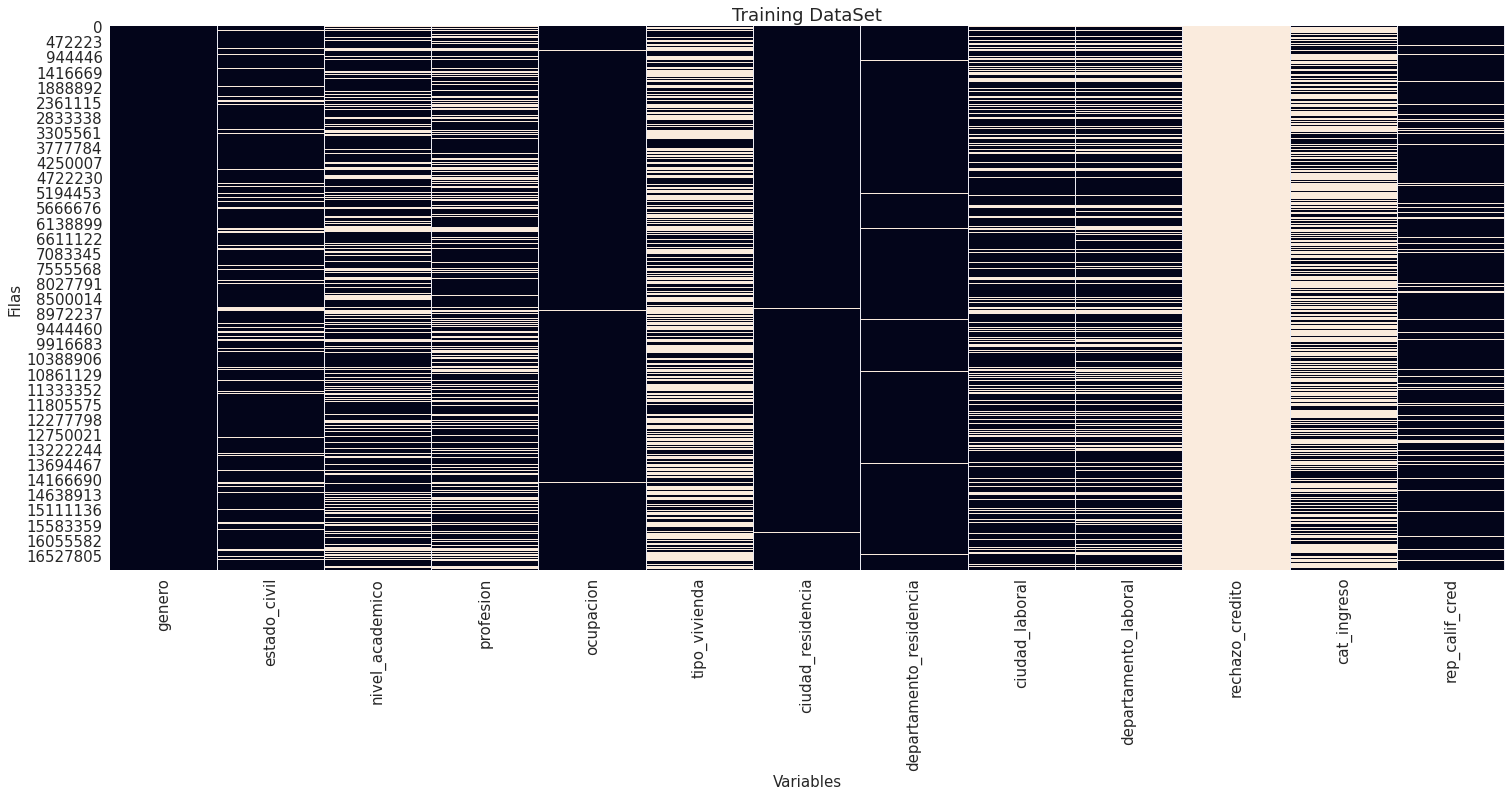

In [38]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
#indice = np.sort(np.random.random_integers(0,len(df),5000000))
sns.heatmap(df.loc[range(0,17000000),features_o].isnull(), cbar=False)
plt.title("Training DataSet")
plt.xlabel('Variables')
plt.ylabel('Filas')

Text(199.0, 0.5, 'Filas')

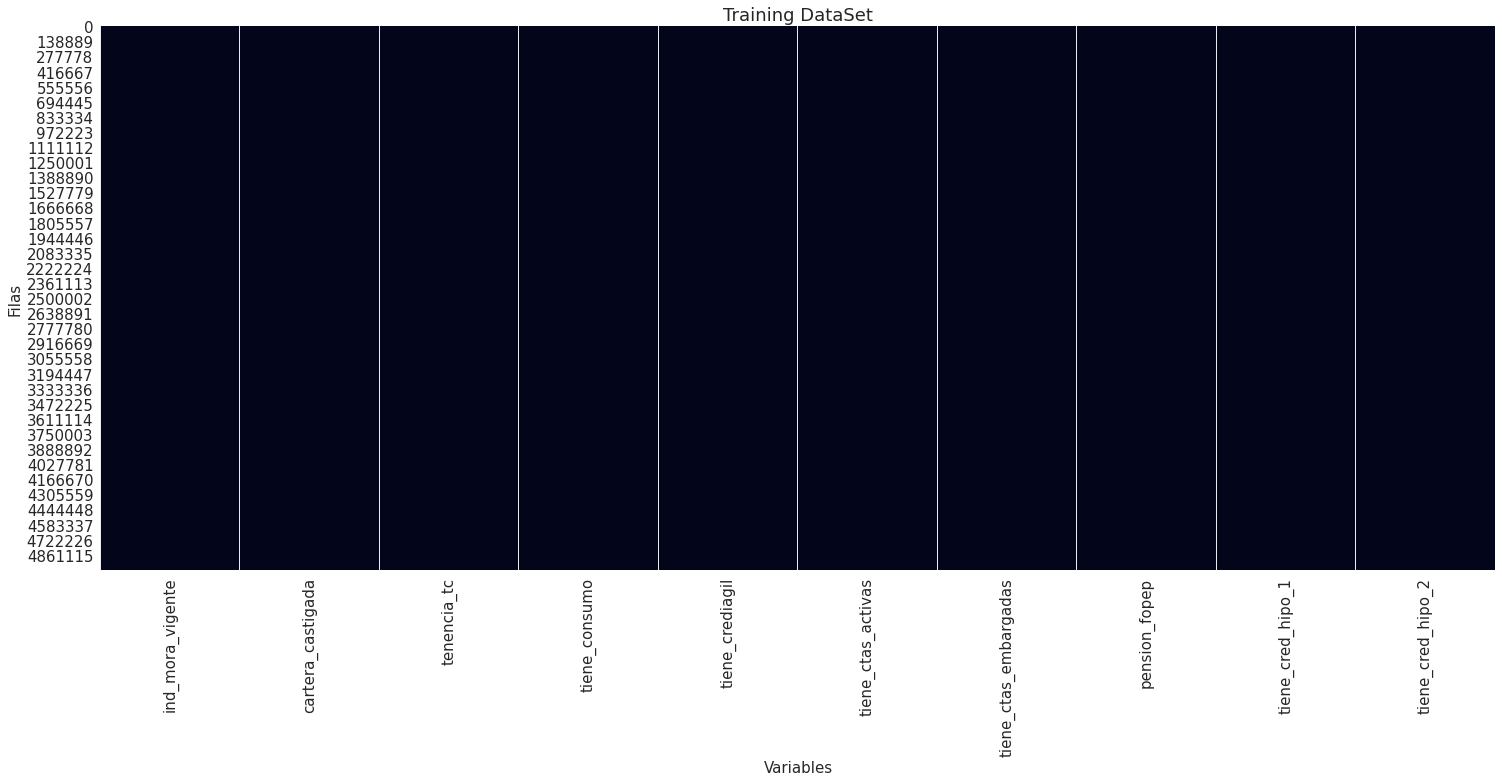

In [39]:
sns.set_style('darkgrid')
plt.rcParams.update({'font.size':15})
plt.figure(figsize=(25,10))
#indice = np.sort(np.random.random_integers(0,len(df),5000000))
sns.heatmap(df.loc[range(0,5000000),features_b].isnull(), cbar=False)
plt.title("Training DataSet")
plt.xlabel('Variables')
plt.ylabel('Filas')

## Verificación

In [40]:
df['estado_civil'].value_counts()/df.shape[0]*100

SOLTERO        46.286986
CASADO         26.628626
UNION LIBRE    11.500299
DIVORCIADO      4.034775
VIUDO           1.743416
Name: estado_civil, dtype: float64

In [41]:
df['nivel_academico'].value_counts()/df.shape[0]*100

UNIVERSITARIO      35.871431
TECNOLOGO          13.210352
BACHILLER          11.062948
ESPECIALIZACION     7.354956
PRIMARIO            1.379094
NINGUNO             1.036450
Name: nivel_academico, dtype: float64

In [42]:
df['profesion'].value_counts()/df.shape[0]*100

OTROS                                           26.967095
ADMINISTRACION                                   7.183974
CONTADURIA                                       3.159289
NINGUNA                                          3.088228
DERECHO                                          2.462601
                                                  ...    
TECNOLOGIA DEPORTIVA                             0.011389
RELIGIOSA                                        0.011103
JOYERO                                           0.006544
INSPECTORES DE ESTABLECIMIENTOS DE ENSEÑANZA     0.003074
ESPEC EN PROBL DE PERS Y ORIENTA ANAL. PRP       0.002197
Name: profesion, Length: 79, dtype: float64

In [43]:
df['profesion'].unique()

array(['TECNOLOGIA SISTEMAS', 'VETERINARIA', nan, 'OTROS',
       'DISEÑO Y PUBLICIDAD', 'COMUNICACION SOCIAL',
       'INGENIERIA DE PETROLEOS', 'ADMINISTRACION', 'DERECHO',
       'PSICOLOGIA', 'BACTERIOLOGIA', 'INGENIERO METALURGICO',
       'INGENIERO', 'INGENIERIA DE SISTEMAS', 'ODONTOLOGIA',
       'INGENIERIA INDUSTRIAL', 'TECNOLOGIA ELECTRICIDAD', 'CONTADURIA',
       'NINGUNA', 'EDUCACION', 'SACERDOTE', 'QUIMICA FARMACEUTICA',
       'COMERCIO INTERNACIONAL', 'TECNOLOGIA AGROPECUARIA',
       'CONSTRUCCION CIVIL', 'INGENIERIA ADMINISTRATIVA',
       'INGENIERIA CIVIL', 'INGENIERO ELECTRONICO',
       'TECNOLOGIA INDUSTRIAL', 'INGENIERIA AMBIENTAL', 'TRABAJO SOCIAL',
       'TECNOLOGIA EN ADMINISTRACION', 'ECONOMIA', 'INGENIERIA AGRICOLA',
       'AGRONOMIA', 'MERCADOTECNIA', 'TRANSPORTADOR', 'ARQUITECTURA',
       'AUXILIAR CONTABLE', 'ENFERMERIA',
       'DECORADORES Y DISEÑADORES COMERCIALES', 'INGENIERIA ELECTRICA',
       'TECNOLOGIA EN CIENCIAS DE LA SALUD', 'SECRETARIADO

In [44]:
df['ocupacion'].value_counts()/df.shape[0]*100

Empleado                    63.150950
Independiente               16.244569
Estudiante                   6.866289
Jubilado                     4.921666
Desempleado sin Ingresos     2.529233
Comerciante                  2.493824
Otro                         1.314447
Pensionado                   0.956285
Rentista de Capital          0.910131
Desempleado con Ingresos     0.269023
Name: ocupacion, dtype: float64

In [45]:
df['tipo_vivienda'].value_counts()/df.shape[0]*100

FAMILIAR     22.756939
PROPIA       15.844226
ALQUILADA     8.403236
Name: tipo_vivienda, dtype: float64

In [46]:
df['departamento_residencia'].value_counts()/df.shape[0]*100

ANTIOQUIA              32.405545
BOGOTA D.C.            22.344194
VALLE                   8.719908
CUNDINAMARCA            6.415487
ATLANTICO               4.962803
SANTANDER               3.241516
BOLIVAR                 2.823012
RISARALDA               1.956874
CALDAS                  1.455868
NORTE DE SANTANDER      1.439545
TOLIMA                  1.438107
CORDOBA                 1.215248
HUILA                   1.106706
META                    1.106119
MAGDALENA               1.102323
QUINDIO                 0.997349
BOYACA                  0.965124
NARINO                  0.956581
CESAR                   0.870319
CAUCA                   0.833430
ESTADO EXTERIOR         0.584002
SUCRE                   0.576181
CASANARE                0.466927
LA GUAJIRA              0.304774
CAQUETA                 0.190208
SAN ANDRES Y PROVID     0.167424
CHOCO                   0.150136
PUTUMAYO                0.084299
ARAUCA                  0.066704
GUAVIARE                0.049540
AMAZONAS  

In [47]:
df['departamento_laboral'].value_counts()/df.shape[0]*100

ANTIOQUIA              22.656815
BOGOTA D.C.            16.792762
VALLE                   6.022182
CUNDINAMARCA            5.508613
ATLANTICO               3.316384
SANTANDER               2.021475
BOLIVAR                 1.921066
RISARALDA               1.297246
CALDAS                  0.958388
NORTE DE SANTANDER      0.948702
TOLIMA                  0.912105
HUILA                   0.728596
MAGDALENA               0.723382
CORDOBA                 0.711583
META                    0.649714
NARINO                  0.648140
QUINDIO                 0.586531
CAUCA                   0.560761
CESAR                   0.525436
BOYACA                  0.518202
AMAZONAS                0.470443
SUCRE                   0.313333
CASANARE                0.262905
LA GUAJIRA              0.193438
SAN ANDRES Y PROVID     0.132421
CAQUETA                 0.119640
ESTADO EXTERIOR         0.108802
CHOCO                   0.101889
PUTUMAYO                0.048917
ARAUCA                  0.044030
VICHADA   

In [48]:
df['ciudad_residencia'].unique()

array(['CALI', 'GARZON', 'PALMIRA', ..., 'LA GALLERA', 'CUNDAY',
       'MATANZA'], dtype=object)

In [49]:
df['ciudad_laboral'].unique()

array(['CALI', nan, 'BOGOTA D.C.', ..., 'SABANAS', 'ZUÑIGA', 'ZU#IGA'],
      dtype=object)

In [50]:
df['rechazo_credito'].value_counts()/df.shape[0]*100

RECHAZO BIZAGI       0.434032
RECHAZO SUFI         0.089165
RECHAZO BANCO        0.017715
RECHAZO FACTORING    0.001158
Name: rechazo_credito, dtype: float64

In [51]:
df['rep_calif_cred'].value_counts()/df.shape[0]*100

A    19.793362
C    13.772256
B    13.661512
G    11.250834
D    11.229894
H     9.858102
E     7.074238
F     4.002711
Name: rep_calif_cred, dtype: float64

In [52]:
100*df[features_o].isnull().sum()/df.shape[0]

genero                      0.000000
estado_civil                9.805898
nivel_academico            30.084770
profesion                  29.996685
ocupacion                   0.343584
tipo_vivienda              52.995599
ciudad_residencia           0.239171
departamento_residencia     0.941068
ciudad_laboral             27.161899
departamento_laboral       30.116454
rechazo_credito            99.457930
cat_ingreso                59.970991
rep_calif_cred              9.357091
dtype: float64

In [53]:
df.shape

(19255248, 65)

In [54]:
df.to_csv("/mnt/workstation/data/input_CategoricasArregladas.csv")